<h1 style="padding:15px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:300%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Body signal of smoking Analysis & Prediction
</h1>

<p style="text-align:center; margin-top: 20px;">
    <img src="https://i-cf65.ch-static.com/content/dam/cf-consumer-healthcare/paradontax/es_AR/assets/about-gum-disease/2.2.2_Causes_Smoking.jpg?auto=format" style='width: 300px; height: 300px; border: 1px solid #ddd;'>
</p>

<p style="text-align:justify; ">

Smoking is the act of inhaling and exhaling the smoke produced by burning tobacco. Tobacco smoke contains thousands of harmful chemicals, many of which are toxic and addictive. Smoking affects nearly every organ in the human body and is one of the leading causes of preventable diseases and deaths worldwide.<br>
<br>
People who smoke are at a significantly higher risk of developing serious health problems, including heart disease, stroke, respiratory illnesses, and various types of cancer. Although quitting smoking can be challenging, stopping at any age greatly reduces health risks. Over time, the body begins to heal, improving lung function, circulation, and overall quality of life.

</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px; margin:0; font-family:serif; font-size:130%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:500">Table Of Contents</p>

<div align="center">

| No | Contents | No | Contents |
|:---| :--- |:---| :---- |
| 1 | [Importing Libraries](#1) | 6 | [Correlation Analysis](#6) |
| 2 | [Dataset Overview](#2) | 7 | [Data Preprocessing](#7) |
| 3 | [Exploratory Data Analysis (EDA)](#3) | 8 | [Model Training](#8) |
| 4 | [Feature Visualization](#4) | 9 | [Performance Evaluation](#9) |
| 5 | [Feature Engineering](#5) | 10 | [Conclusions & Closing](#10) |

</div>
</div>

<div style="margin-top: 30px; padding: 15px; border: 1.5px solid #000000; border-radius: 20px; background-color: #ffffff; font-family: serif; color: #000000; text-align: center;">
    The dataset was shared by following link: 
    <a href="https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking/data" style="color: #000000; font-weight: bold; text-decoration: underline;">[Click here to view dataset]</a>
</div>

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Importing Libraries
</p>

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

# Set visualization style
plt.style.use("seaborn-v0_8-darkgrid")
# To show all columns
pd.set_option('display.max_columns', 15)

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Dataset Overview
</p>

In [63]:
data = pd.read_csv("data/smoking.csv")
df = data.copy()

In [64]:
print(f"Shape of The Dataset : {df.shape}")
print(f"Glimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (55692, 27)
Glimpse of The Dataset :


In [65]:
df = df.copy(deep=True)

df.rename(columns = {
    "height(cm)" : "height_cm", "weight(kg)" : "weight_kg",
"waist(cm)" : "waist_cm", "eyesight(left)" : "eyesight_left",
"eyesight(right)" : "eyesight_right", "hearing(left)" : "hearing_left",
"hearing(right)" : "hearing_right", "fasting blood sugar" : "fasting_blood_sugar",
"Cholesterol" : "cholesterol", "HDL" : "hdl", "LDL" : "ldl",
"Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
"AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
inplace = True)

In [66]:
print(f"Informations About The Dataset :\n")
print(df.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height_cm            55692 non-null  int64  
 4   weight_kg            55692 non-null  int64  
 5   waist_cm             55692 non-null  float64
 6   eyesight_left        55692 non-null  float64
 7   eyesight_right       55692 non-null  float64
 8   hearing_left         55692 non-null  float64
 9   hearing_right        55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting_blood_sugar  55692 non-null  float64
 13  cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  hd

In [67]:
df.describe().T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

In [68]:
df.describe(include = object).T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

In [69]:
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a979b9a9d8f","color":"white","border": "1.5px  solid black"})

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Data Cleaning
</p>

In [70]:
dup = df[df.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {df.shape[0]} entries in this dataset.")

df.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {df.shape[0]} entries in this dataset.")

There are 0 duplicate entries among 55692 entries in this dataset.

After removing duplicate entries there are 55692 entries in this dataset.


In [71]:
df["gender"] = df["gender"].replace({"M" : "Male" , "F" : "Female"})
df["dental_caries"] = df["dental_caries"].replace({1 : "Yes" , 0 : "No"})
df["tartar"] = df["tartar"].replace({"Y" : "Yes" , "N" : "No"})
df["smoking"] = df["smoking"].replace({1 : "Yes" , 0 : "No"})

In [72]:
counts_sdo = df["ID"].value_counts()
print(counts_sdo[counts_sdo > 1])

Series([], Name: count, dtype: int64)


In [73]:
df["bmi"] = df["weight_kg"]/((df["height_cm"]/100)**2) 
df["avg_eyesight"] = (df["eyesight_left"]+df["eyesight_right"])/2 
df["hdl_to_ldl"] = df["hdl"]/df["ldl"] 

df = df.drop(["ID","weight_kg","height_cm","eyesight_left","eyesight_right","hearing_right","hearing_left","hdl","ldl","oral"], axis = 1)

print(df.dtypes)

gender                  object
age                      int64
waist_cm               float64
systolic               float64
relaxation             float64
fasting_blood_sugar    float64
cholesterol            float64
triglyceride           float64
hemoglobin             float64
urine_protein          float64
serum_creatinine       float64
ast                    float64
alt                    float64
gtp                    float64
dental_caries           object
tartar                  object
smoking                 object
bmi                    float64
avg_eyesight           float64
hdl_to_ldl             float64
dtype: object



<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Table of Variables
</p>

<br>

<div align="center">

| Variable            | Type            | Description                               | Values / Units  |
| :------------------ | :-------------- | :---------------------------------------- | :-------------- |
| gender              | Categorical     | Biological sex                            | Male / Female   |
| age                 | Numerical       | Age                                       | Years           |
| height              | Numerical       | body mass index = weight  / height^2      | kg / cm^2       |
| weight              | Numerical       | Weight                                    | kg              |
| waist               | Numerical       | Waist circumference                       | cm              |
| avg_eyesight        | Numerical       | Average of Right and Left eyesight        | Diopters        |
| relaxation          | Numerical       | Diastolic blood pressure                  | mmHg            |
| fasting_blood_sugar | Numerical       | Fasting blood sugar                       | mg/dL           |
| cholesterol         | Numerical       | Total cholesterol                         | mg/dL           |
| triglyceride        | Numerical       | Triglycerides                             | mg/dL           |
| HDL to LDL          | Numerical       | ratio of good cholesterol                 | mg/dL           |
| hemoglobin          | Numerical       | Hemoglobin level                          | g/dL            |
| Urine protein       | Ordinal         | Urine protein level                       | 1–5             |
| serum creatinine    | Numerical       | Kidney function indicator                 | mg/dL           |
| AST                 | Numerical       | Aspartate aminotransferase (liver enzyme) | U/L             |
| ALT                 | Numerical       | Alanine aminotransferase (liver enzyme)   | U/L             |
| gtp                 | Numerical       | Gamma-glutamyl transferase (liver enzyme) | U/L             |
| dental_caries       | Binary          | Presence of dental caries                 | 0 = No, 1 = Yes |
| tartar              | Binary          | Presence of dental tartar                 | 0 = No, 1 = Yes |
| smoking             | Target (Binary) | Smoking status                            | 0 = No, 1 = Yes |                  
</div>
</div>






<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Settings for Visualizations
</p>

In [74]:
colors_palette = {
    "coral": "#e15759",
    "steel_blue": "#4e79a7",
    "orange": "#f28e2b",
    "muted_teal": "#76b7b2",
    "sage_green": "#59a14f"
}


In [75]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_columns = df.select_dtypes(include="object").columns.tolist()

In [76]:
def remove_outliers_iqr(df, numeric_cols):
    df_clean = df.copy()

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[
            (df_clean[col] >= lower) &
            (df_clean[col] <= upper)
        ]
    print("Original shapes:\n")
    print(df.shape)

    print("Without outliers:\n")
    print(df_clean.shape)

    return df_clean


In [77]:
def plot_histogram(columns, df, bins=20):

    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        data = df[col].dropna()
        mean_val = data.mean()

        ax.hist(
            data,
            bins=bins,
            alpha=0.7,
            color=colors_palette["steel_blue"],
            edgecolor="white"
        )

        ax.axvline(
            mean_val,
            color="black",
            linestyle="--",
            linewidth=2,
            label=f"Mean: {mean_val:.2f}"
        )

        ax.set_title(col, fontsize=14)
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
        ax.legend()

    # Remove empty subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


In [78]:
def plot_boxplot(columns, df):

    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        data = df[col].dropna()
        mean_val = data.mean()

        ax.boxplot(
            data,
            vert=True,
            widths=0.5,
            patch_artist=True,
            boxprops=dict(facecolor=colors_palette["steel_blue"], edgecolor="white"),
            medianprops=dict(color="black", linewidth=2),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops=dict(marker="o", markersize=4, markerfacecolor="gray", alpha=0.6)
        )

        ax.axhline(
            mean_val,
            color="black",
            linestyle="--",
            linewidth=2,
            label=f"Mean: {mean_val:.2f}"
        )

        ax.set_title(col, fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel(col)
        ax.legend()

    # Remove empty subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


In [79]:
def plot_binary_pie_charts(columns, df):
    n_vars = len(columns)
    n_cols = 2
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        counts = df[col].value_counts().sort_index()

        labels = counts.index.astype(str)
        values = counts.values

        colors = [
            colors_palette["steel_blue"],
            colors_palette["coral"]
        ]

        wedges, texts, autotexts = ax.pie(
            values,
            autopct="%.2f%%",
            pctdistance=0.7,
            startangle=90,
            radius=0.9,
            colors=colors,
            shadow=True,
            textprops=dict(size=14, color="white"),
            wedgeprops=dict(
                width=0.45,
                edgecolor="white",
                linewidth=4
            )
        )

        ax.set_title(f"\n{col}", fontsize=18)
        ax.legend(
            wedges,
            labels,
            title="Class",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )

    # Remove unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()

In [80]:
def plot_comparison_histogram_style(columns, group0,label0, group1,label1):
    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        data_0 = group0[col].dropna()
        data_1 = group1[col].dropna()

        mean_0 = data_0.mean()
        mean_1 = data_1.mean()


        ax.hist(
            data_0, bins=20, alpha=0.6,
            color = colors_palette["steel_blue"], edgecolor="white",
            label=label0
        )

        ax.hist(
            data_1, bins=20, alpha=0.6,
            color = colors_palette["coral"], edgecolor="white",
            label = label1
        )


        ax.axvline(mean_0, color = colors_palette["steel_blue"], linestyle="--", linewidth=2)
        ax.axvline(mean_1, color = colors_palette["coral"], linestyle="--", linewidth=2)

        ax.set_title(col, fontsize=14)
        ax.set_ylabel("Frequency")
        ax.legend()

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Data Visualization
</p>

 **Distribution of Numerical and Categorical Features**

In [81]:
print(f"Shape of The Dataset : {df.shape}")
print(f"Glimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (55692, 20)
Glimpse of The Dataset :


In [82]:
df.describe().T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

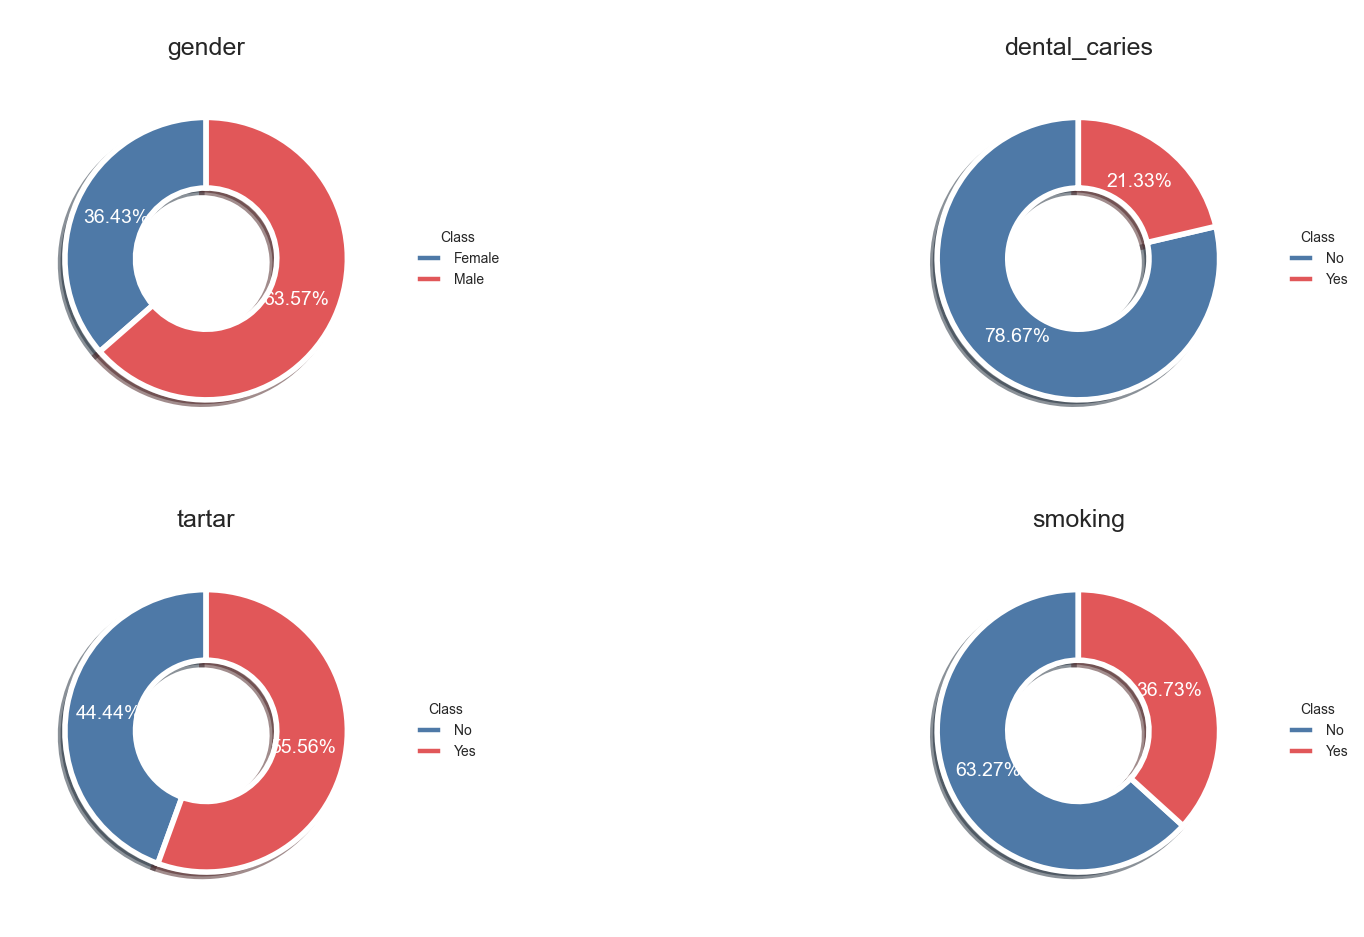

In [83]:
plot_binary_pie_charts(cat_columns, df)

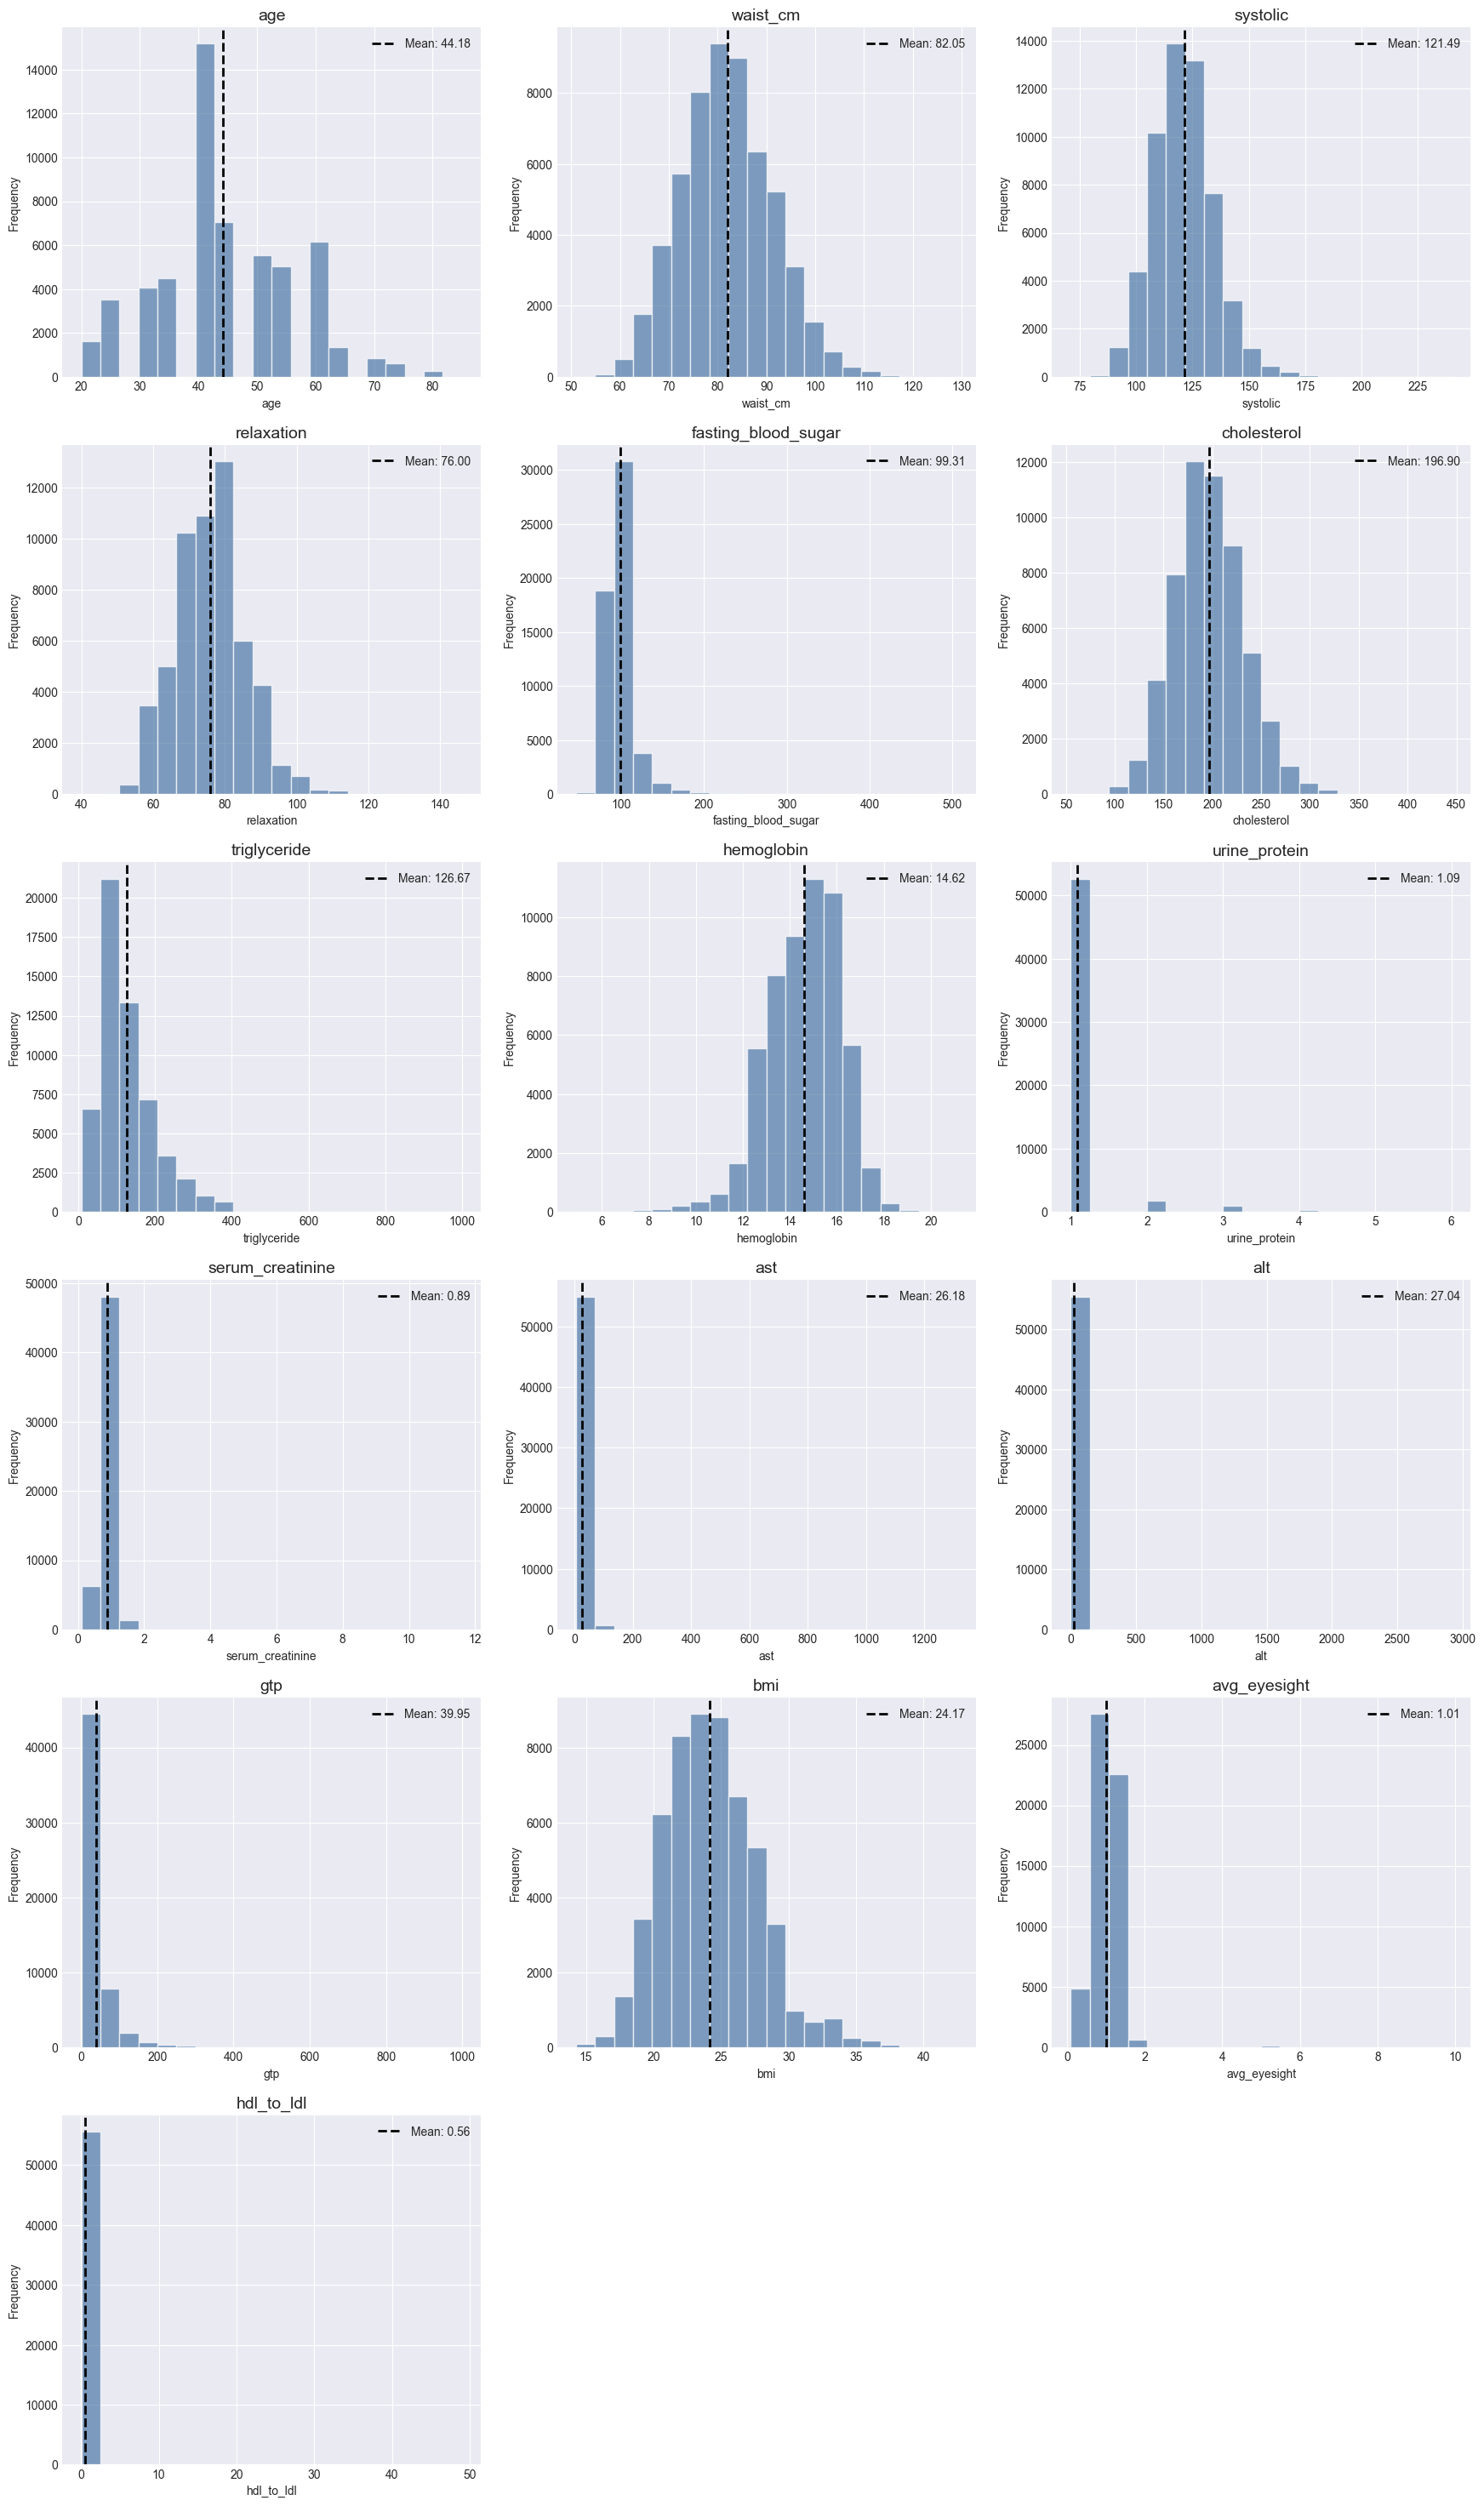

In [84]:
plot_histogram(numeric_cols, df)

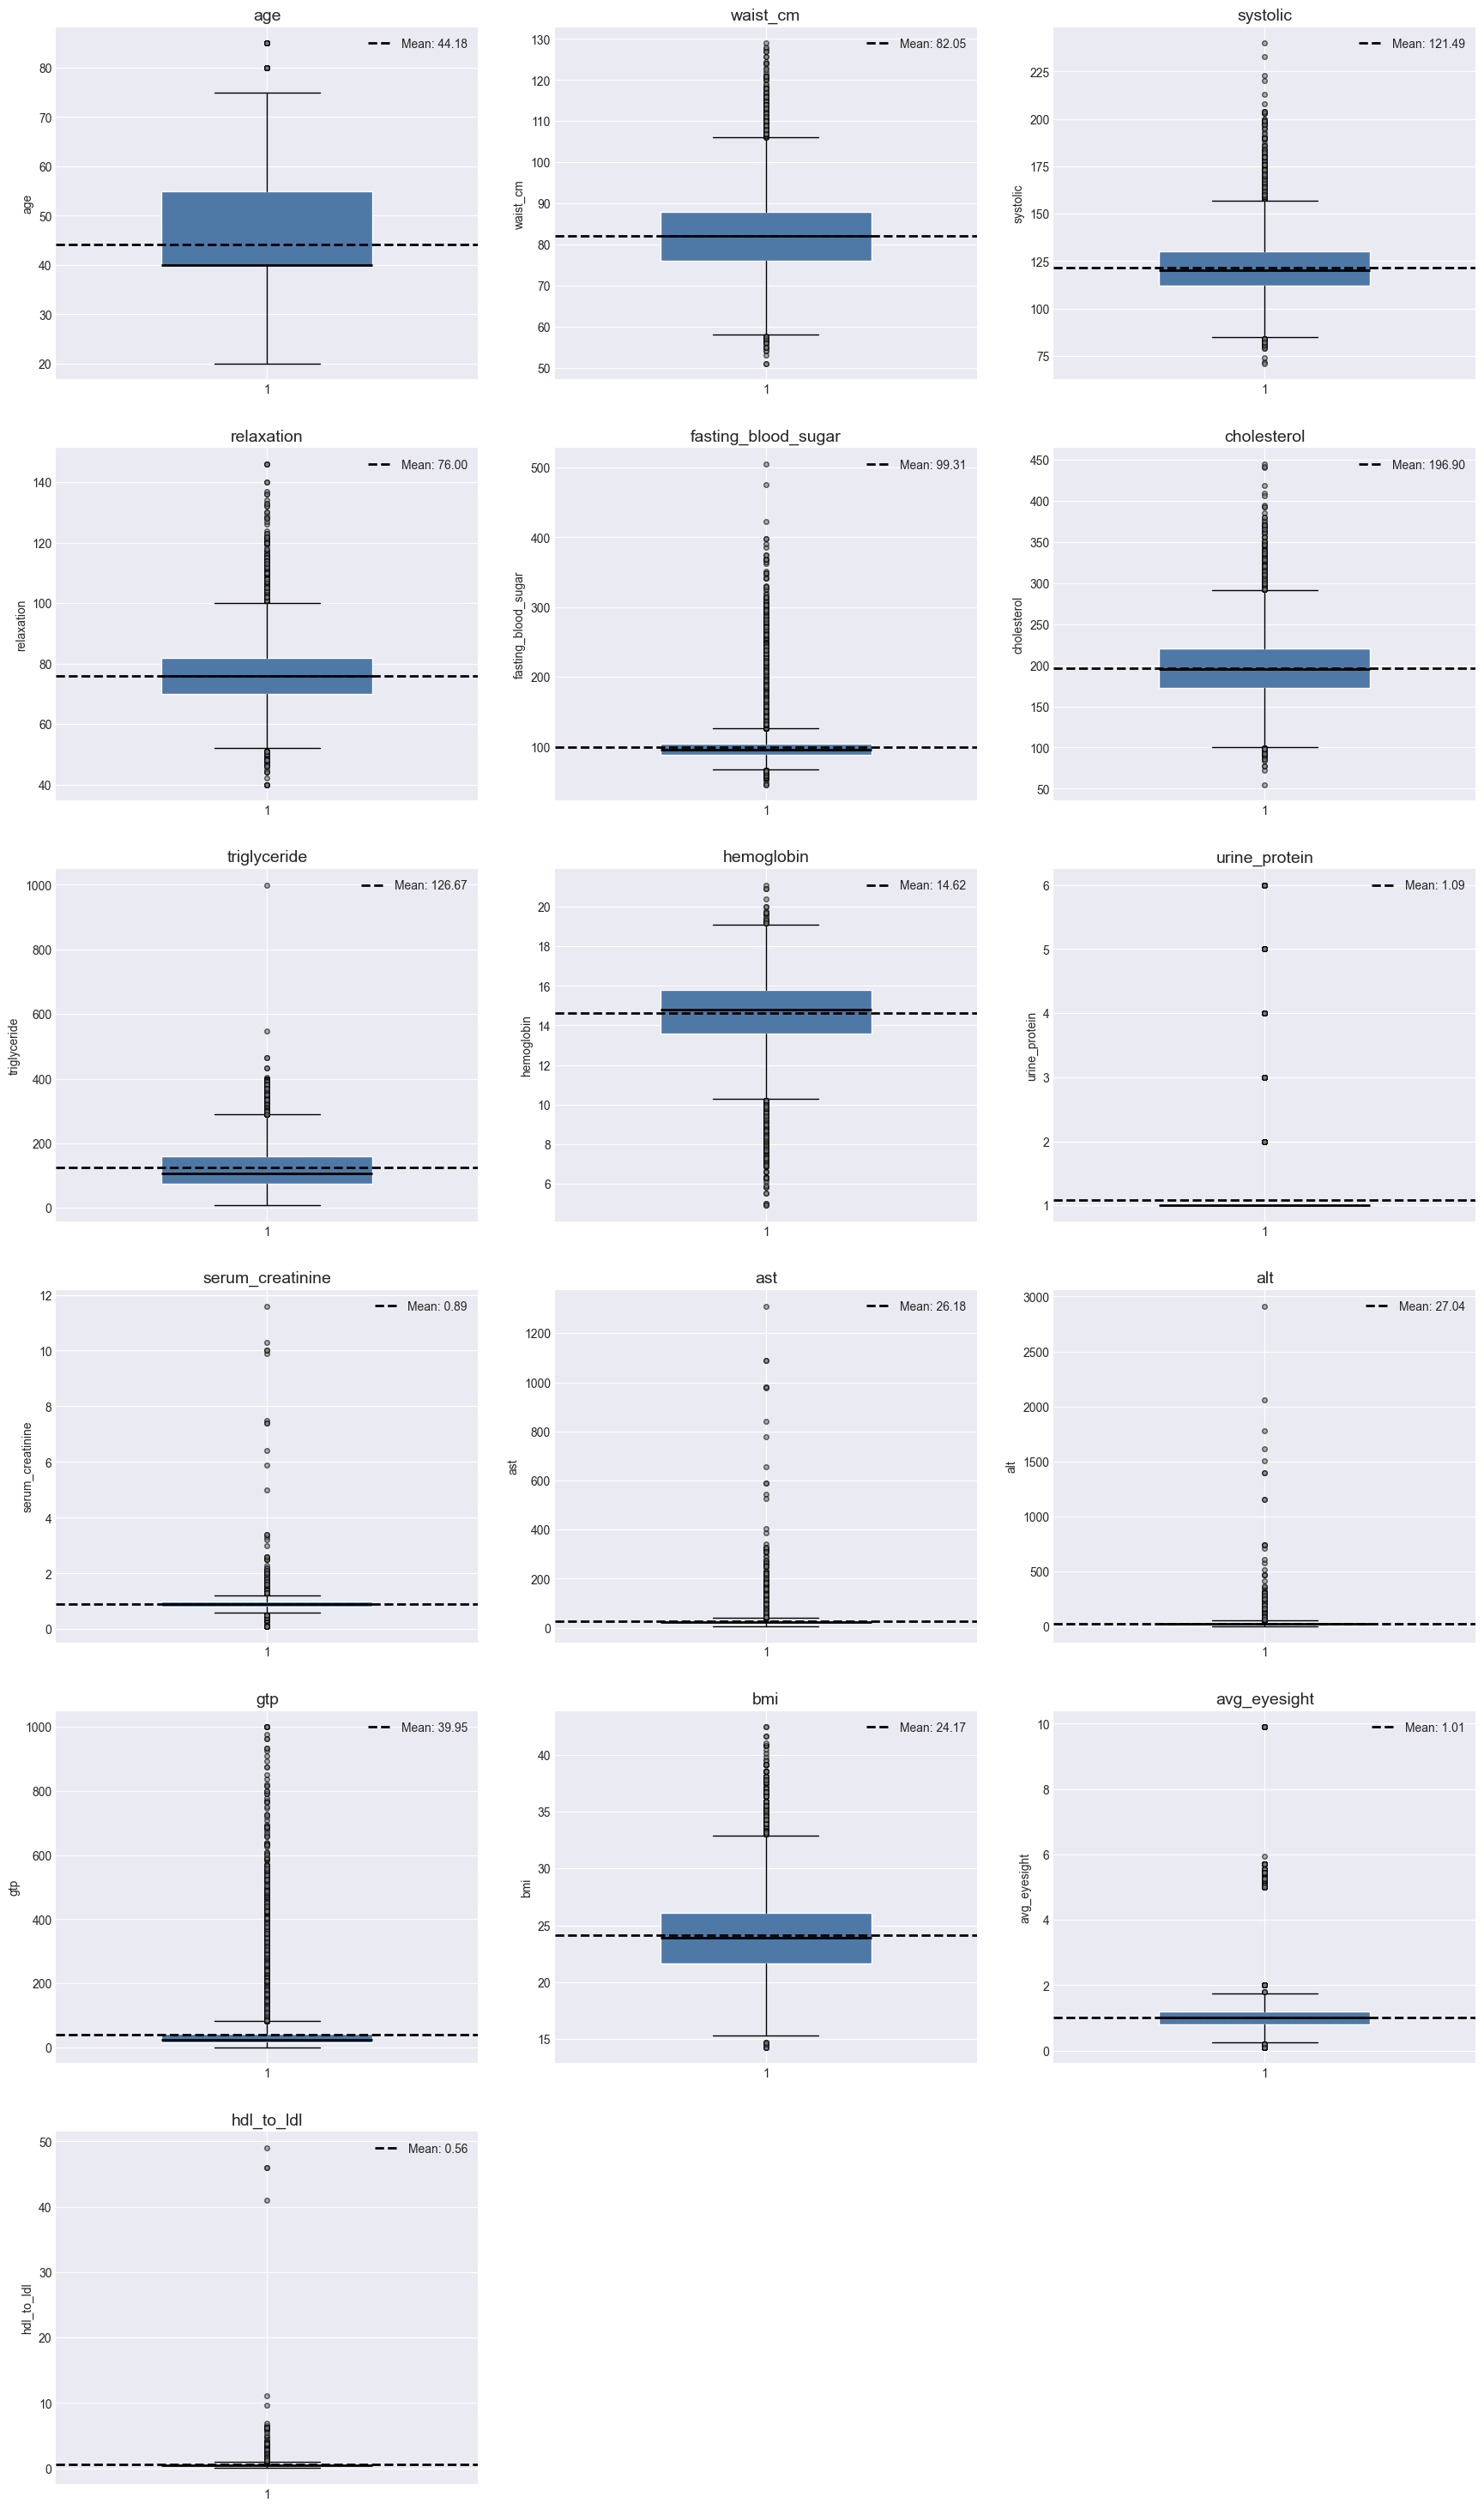

In [85]:
plot_boxplot(numeric_cols, df)

Original shapes:

(55692, 20)
Without outliers:

(32636, 20)


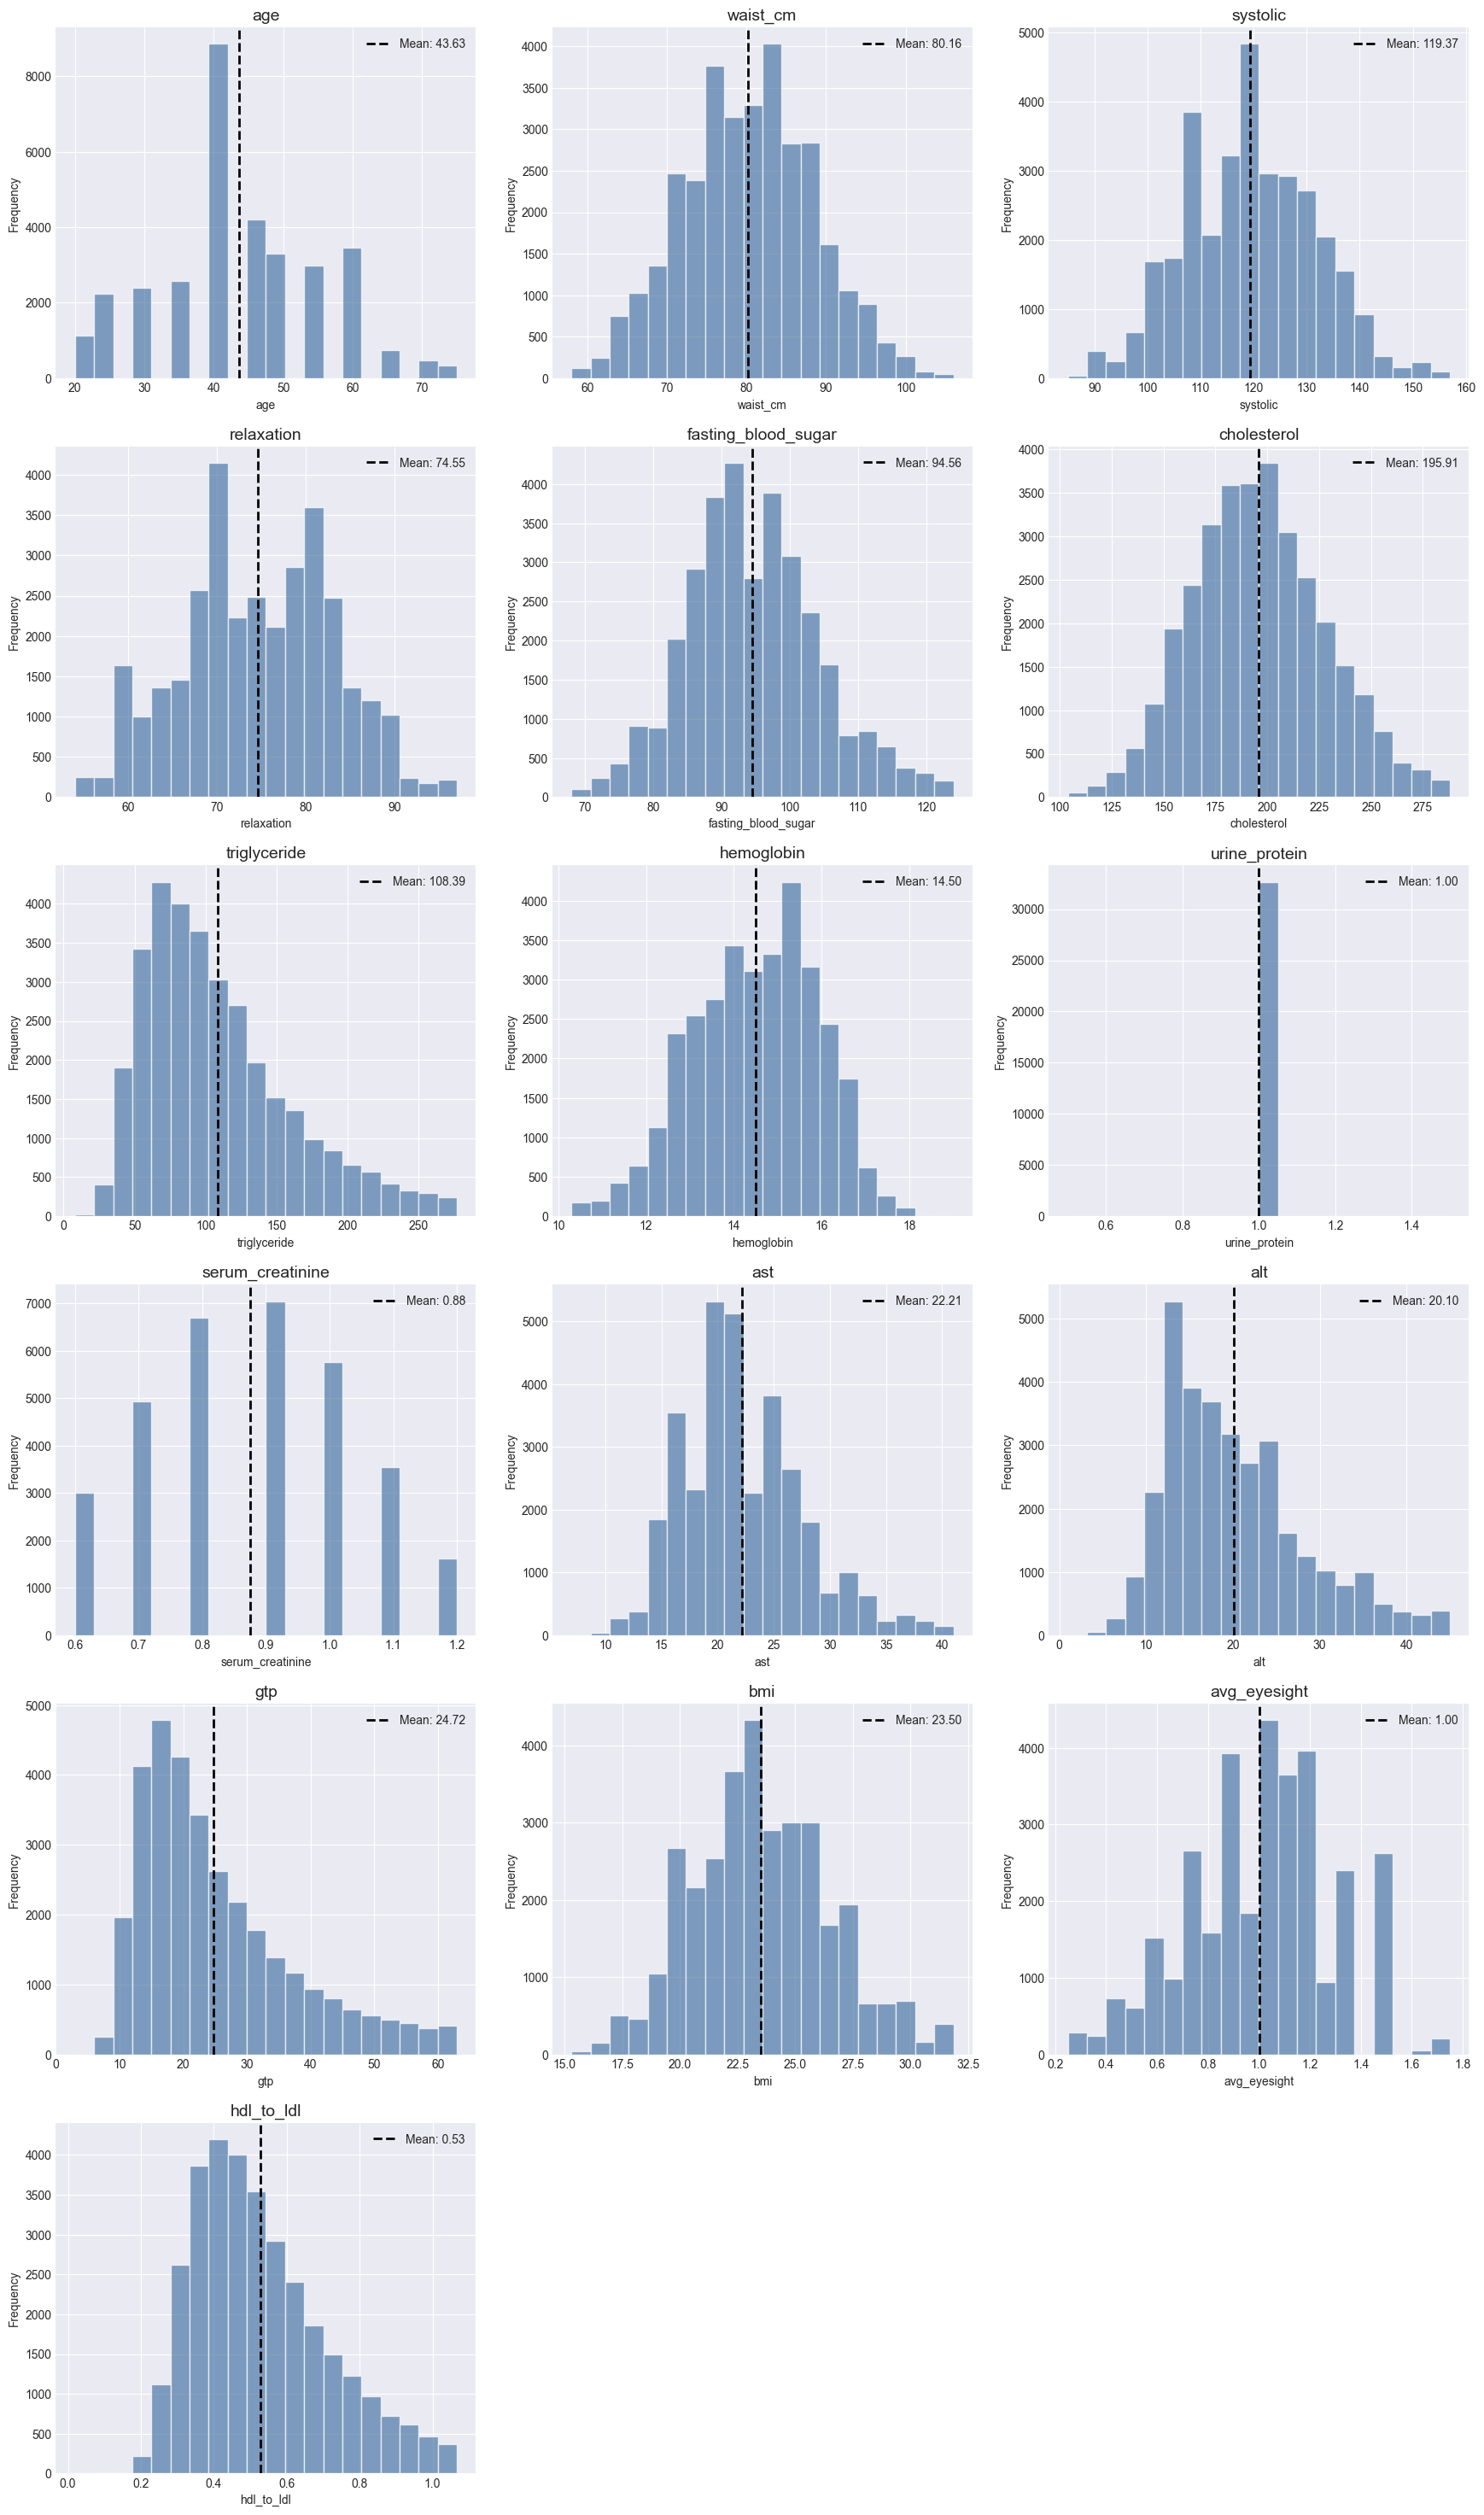

In [86]:
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

plot_histogram(numeric_cols, df_no_outliers)

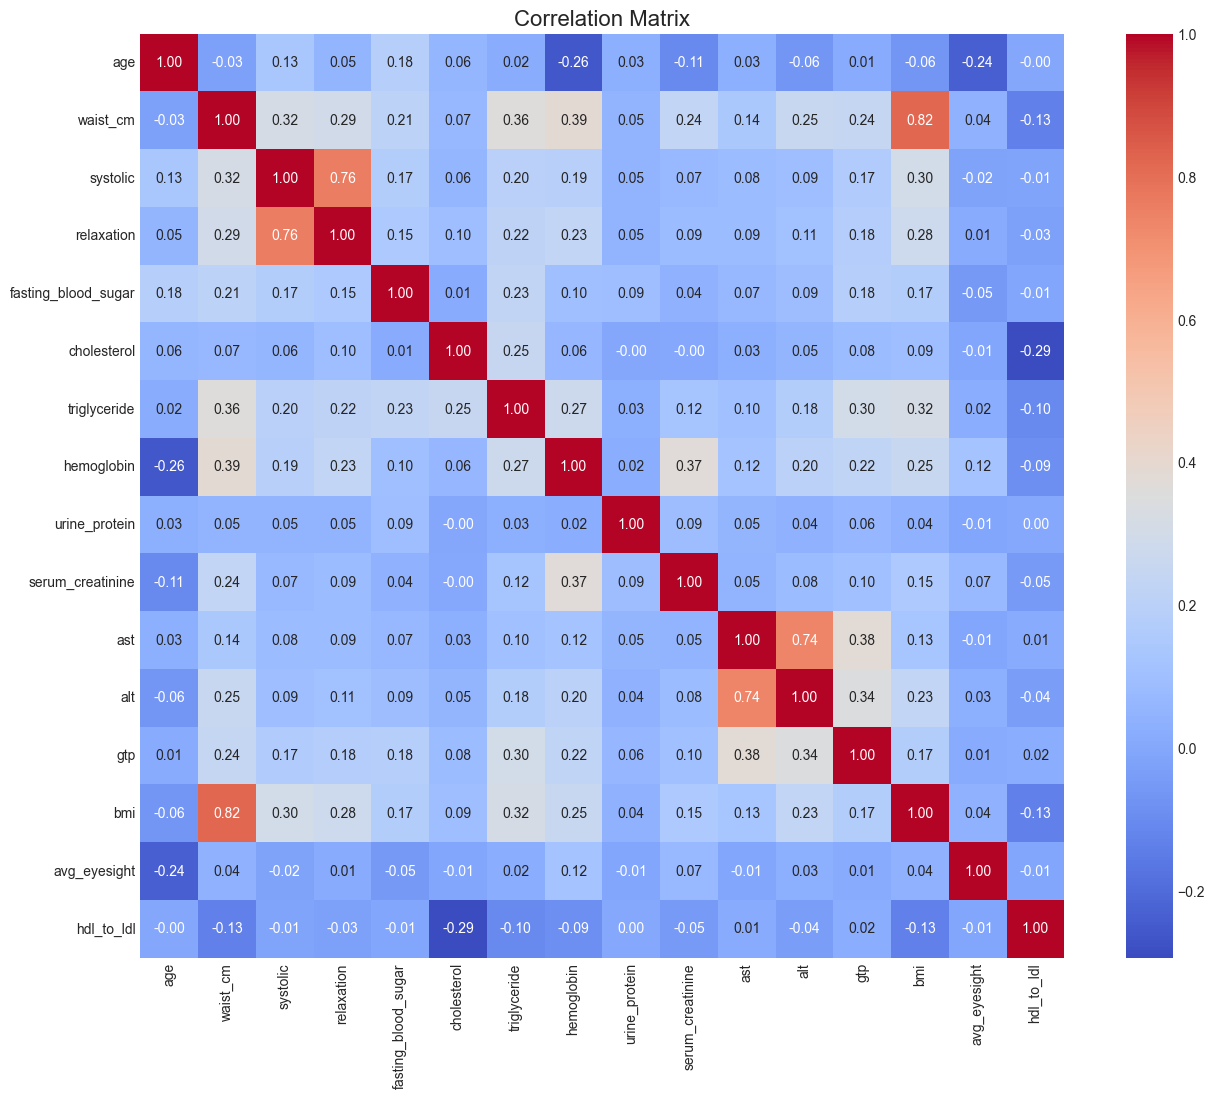

In [87]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Group-Based Analysis
</p>

**Smoking-Based Analysis (Non-Smoker vs Smoker)**

In [88]:
smoking_0 = df[df["smoking"] == "No"]
smoking_1 = df[df["smoking"] == "Yes"]


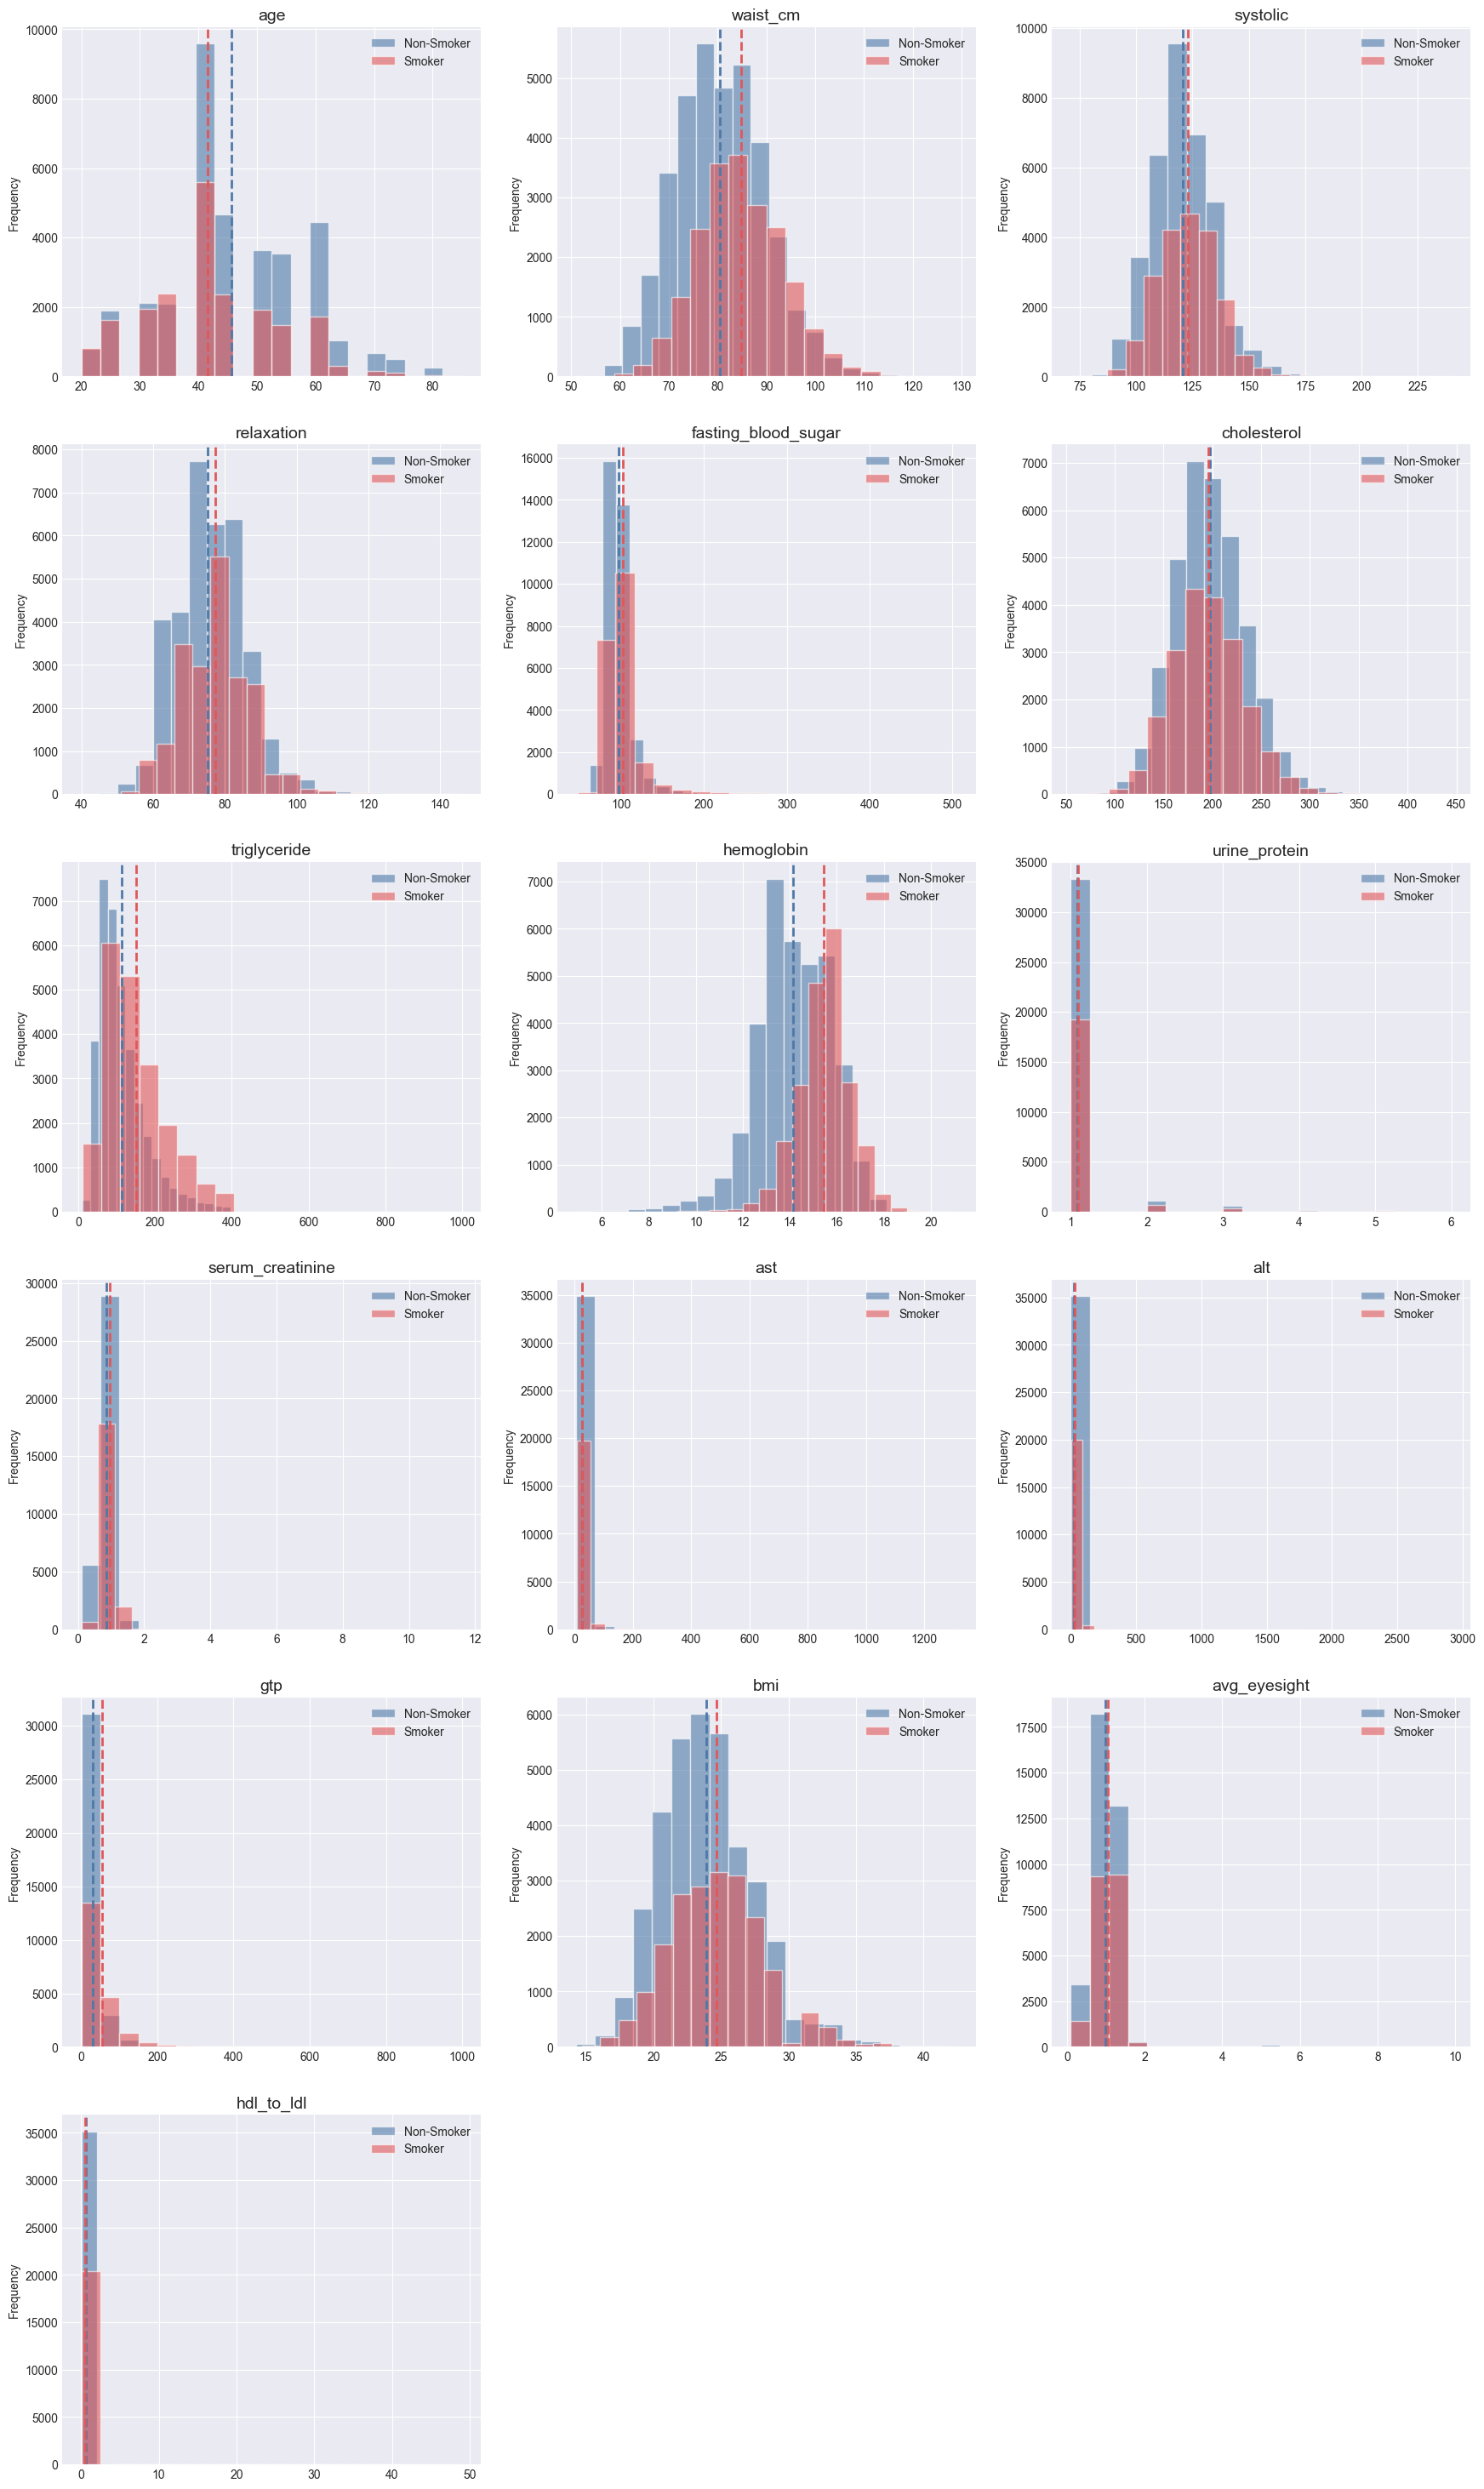

In [89]:
plot_comparison_histogram_style(numeric_cols, smoking_0, "Non-Smoker", smoking_1,"Smoker")

In [90]:
smoking_0_no_out = remove_outliers_iqr(smoking_0, numeric_cols)
smoking_1_no_out = remove_outliers_iqr(smoking_1, numeric_cols)

Original shapes:

(35237, 20)
Without outliers:

(21971, 20)
Original shapes:

(20455, 20)
Without outliers:

(12323, 20)


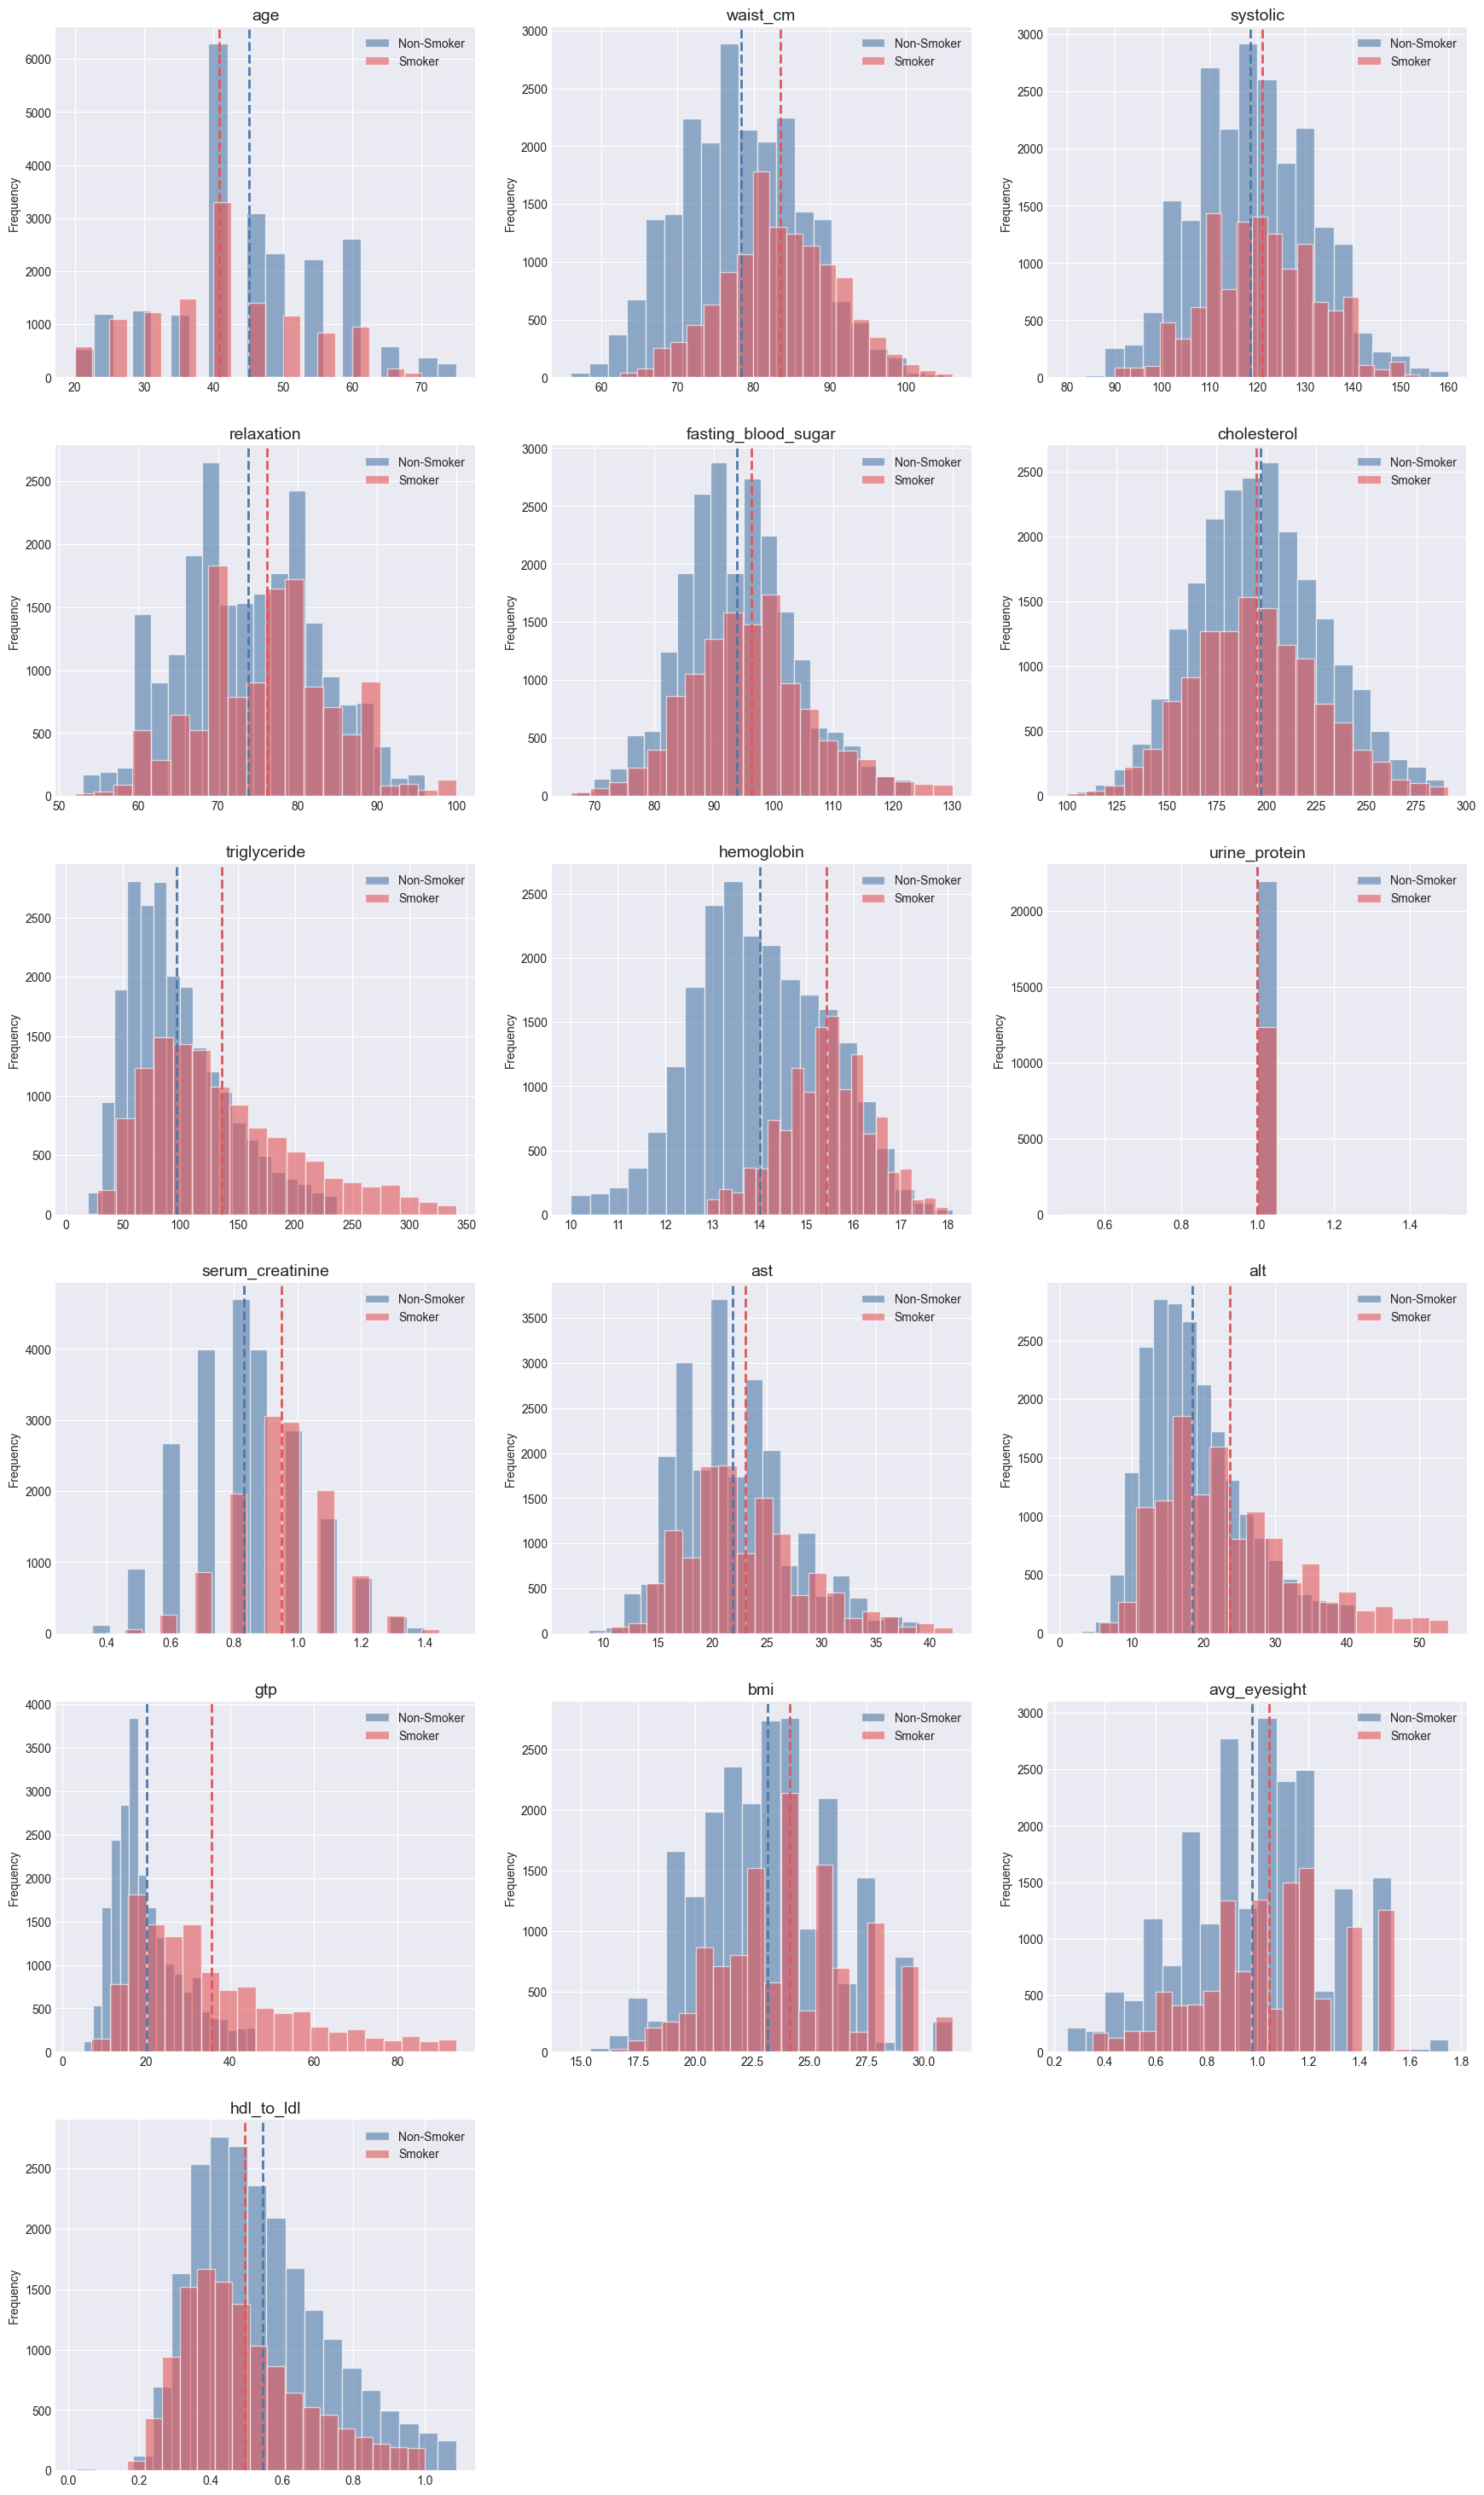

In [91]:
plot_comparison_histogram_style(numeric_cols, smoking_0_no_out,"Non-Smoker", smoking_1_no_out,"Smoker")

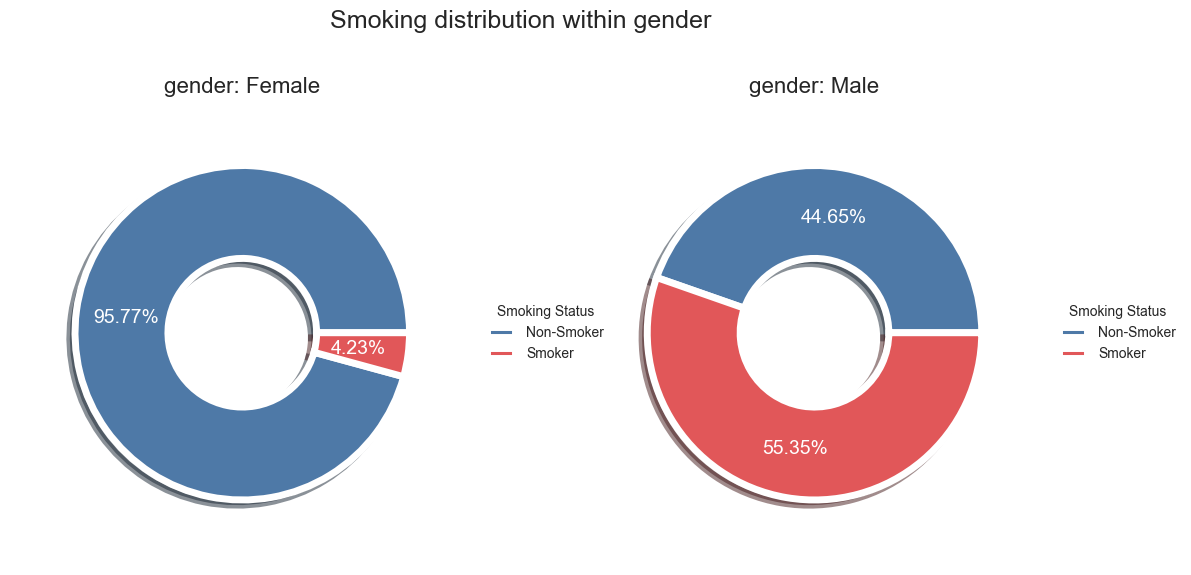

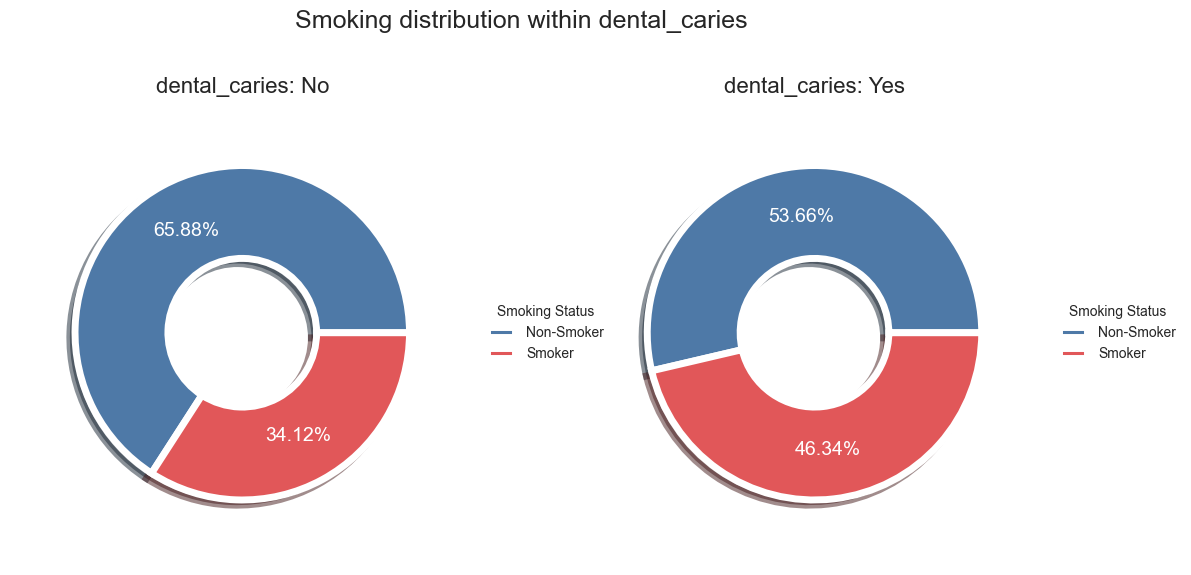

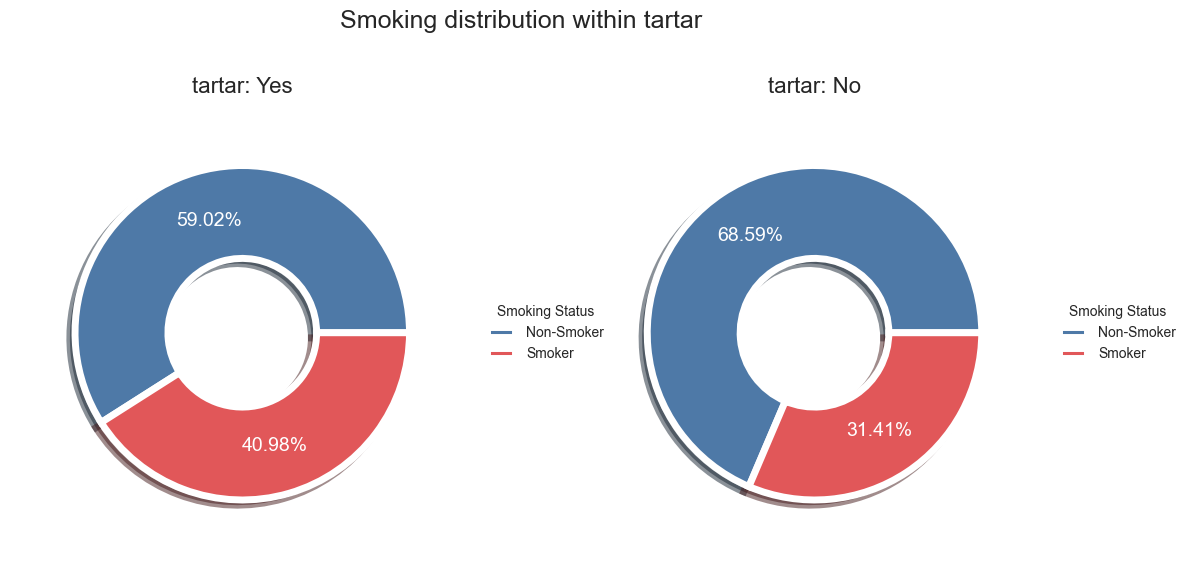

In [92]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
categorical_cols = [c for c in categorical_cols if c not in ["smoking"]]

for col in categorical_cols:

    categories = df[col].dropna().unique()
    n_cat = len(categories)

    fig, axs = plt.subplots(1, n_cat, figsize=(6 * n_cat, 6))
    if n_cat == 1:
        axs = [axs]

    plt.tight_layout(pad=4.0)

    for i, category in enumerate(categories):
        ax = axs[i]

        subset = df[df[col] == category]

        counts = subset["smoking"].value_counts().reindex(["No", "Yes"], fill_value=0)

        labels = ["Non-Smoker", "Smoker"]
        colors = ["#4e79a7", "#e15759"]

        ax.pie(
            counts.values,
            autopct="%.2f%%",
            pctdistance=0.7,
            startangle=0,
            radius=0.9,
            colors=colors,
            shadow=True,
            textprops=dict(color="white", size=14),
            wedgeprops=dict(width=0.5, edgecolor="white", linewidth=5)
        )

        ax.set_title(f"{col}: {category}", fontsize=16)

        ax.legend(
            labels,
            title="Smoking Status",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )

    plt.suptitle(
        f"Smoking distribution within {col}",
        fontsize=18,
        y=1.05
    )

    plt.show()


**Smoking-Male-Based Analysis (Male Non-Smoker vs Male Smoker)**

In [93]:
smoking_male = smoking_1[smoking_1["gender"] == "Male"]
no_smoking_male = smoking_0[smoking_0["gender"] == "Male"]

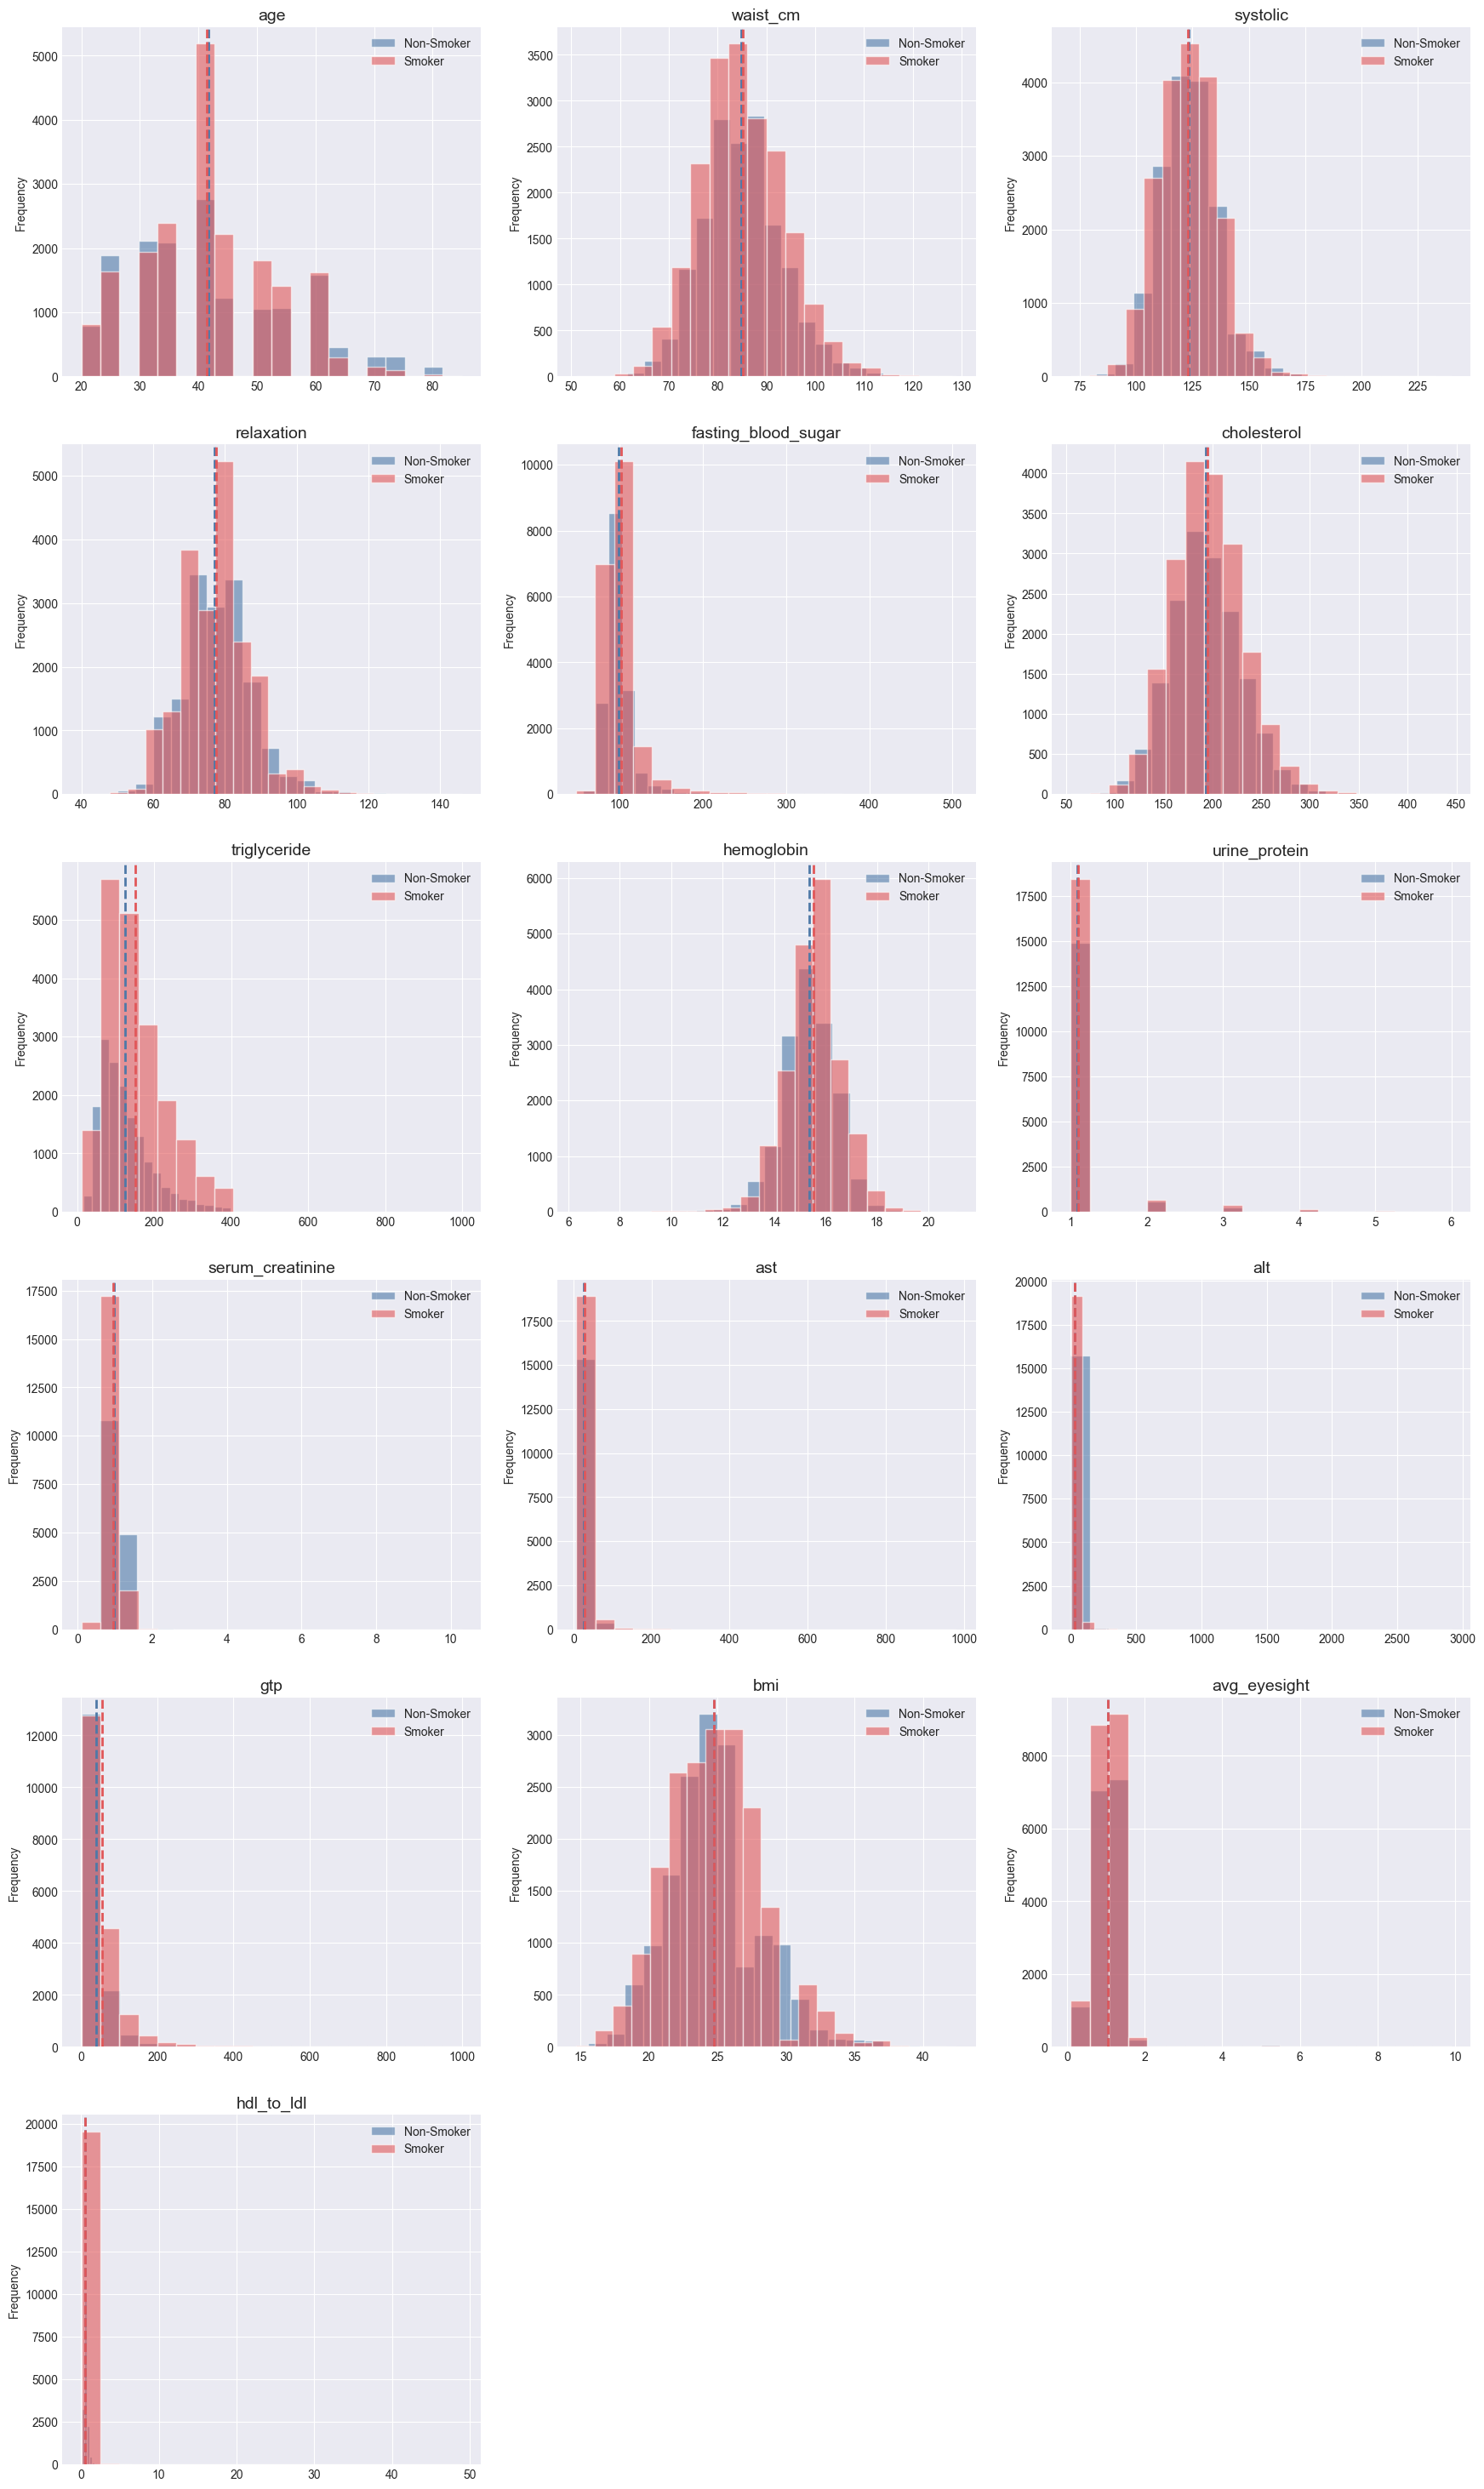

In [94]:
plot_comparison_histogram_style(numeric_cols,no_smoking_male,"Non-Smoker",smoking_male,"Smoker")

In [95]:
smoking_male_ou = remove_outliers_iqr(smoking_male,numeric_cols)
no_smoking_male_ou = remove_outliers_iqr(no_smoking_male,numeric_cols)

Original shapes:

(19596, 20)
Without outliers:

(11917, 20)
Original shapes:

(15805, 20)
Without outliers:

(9710, 20)


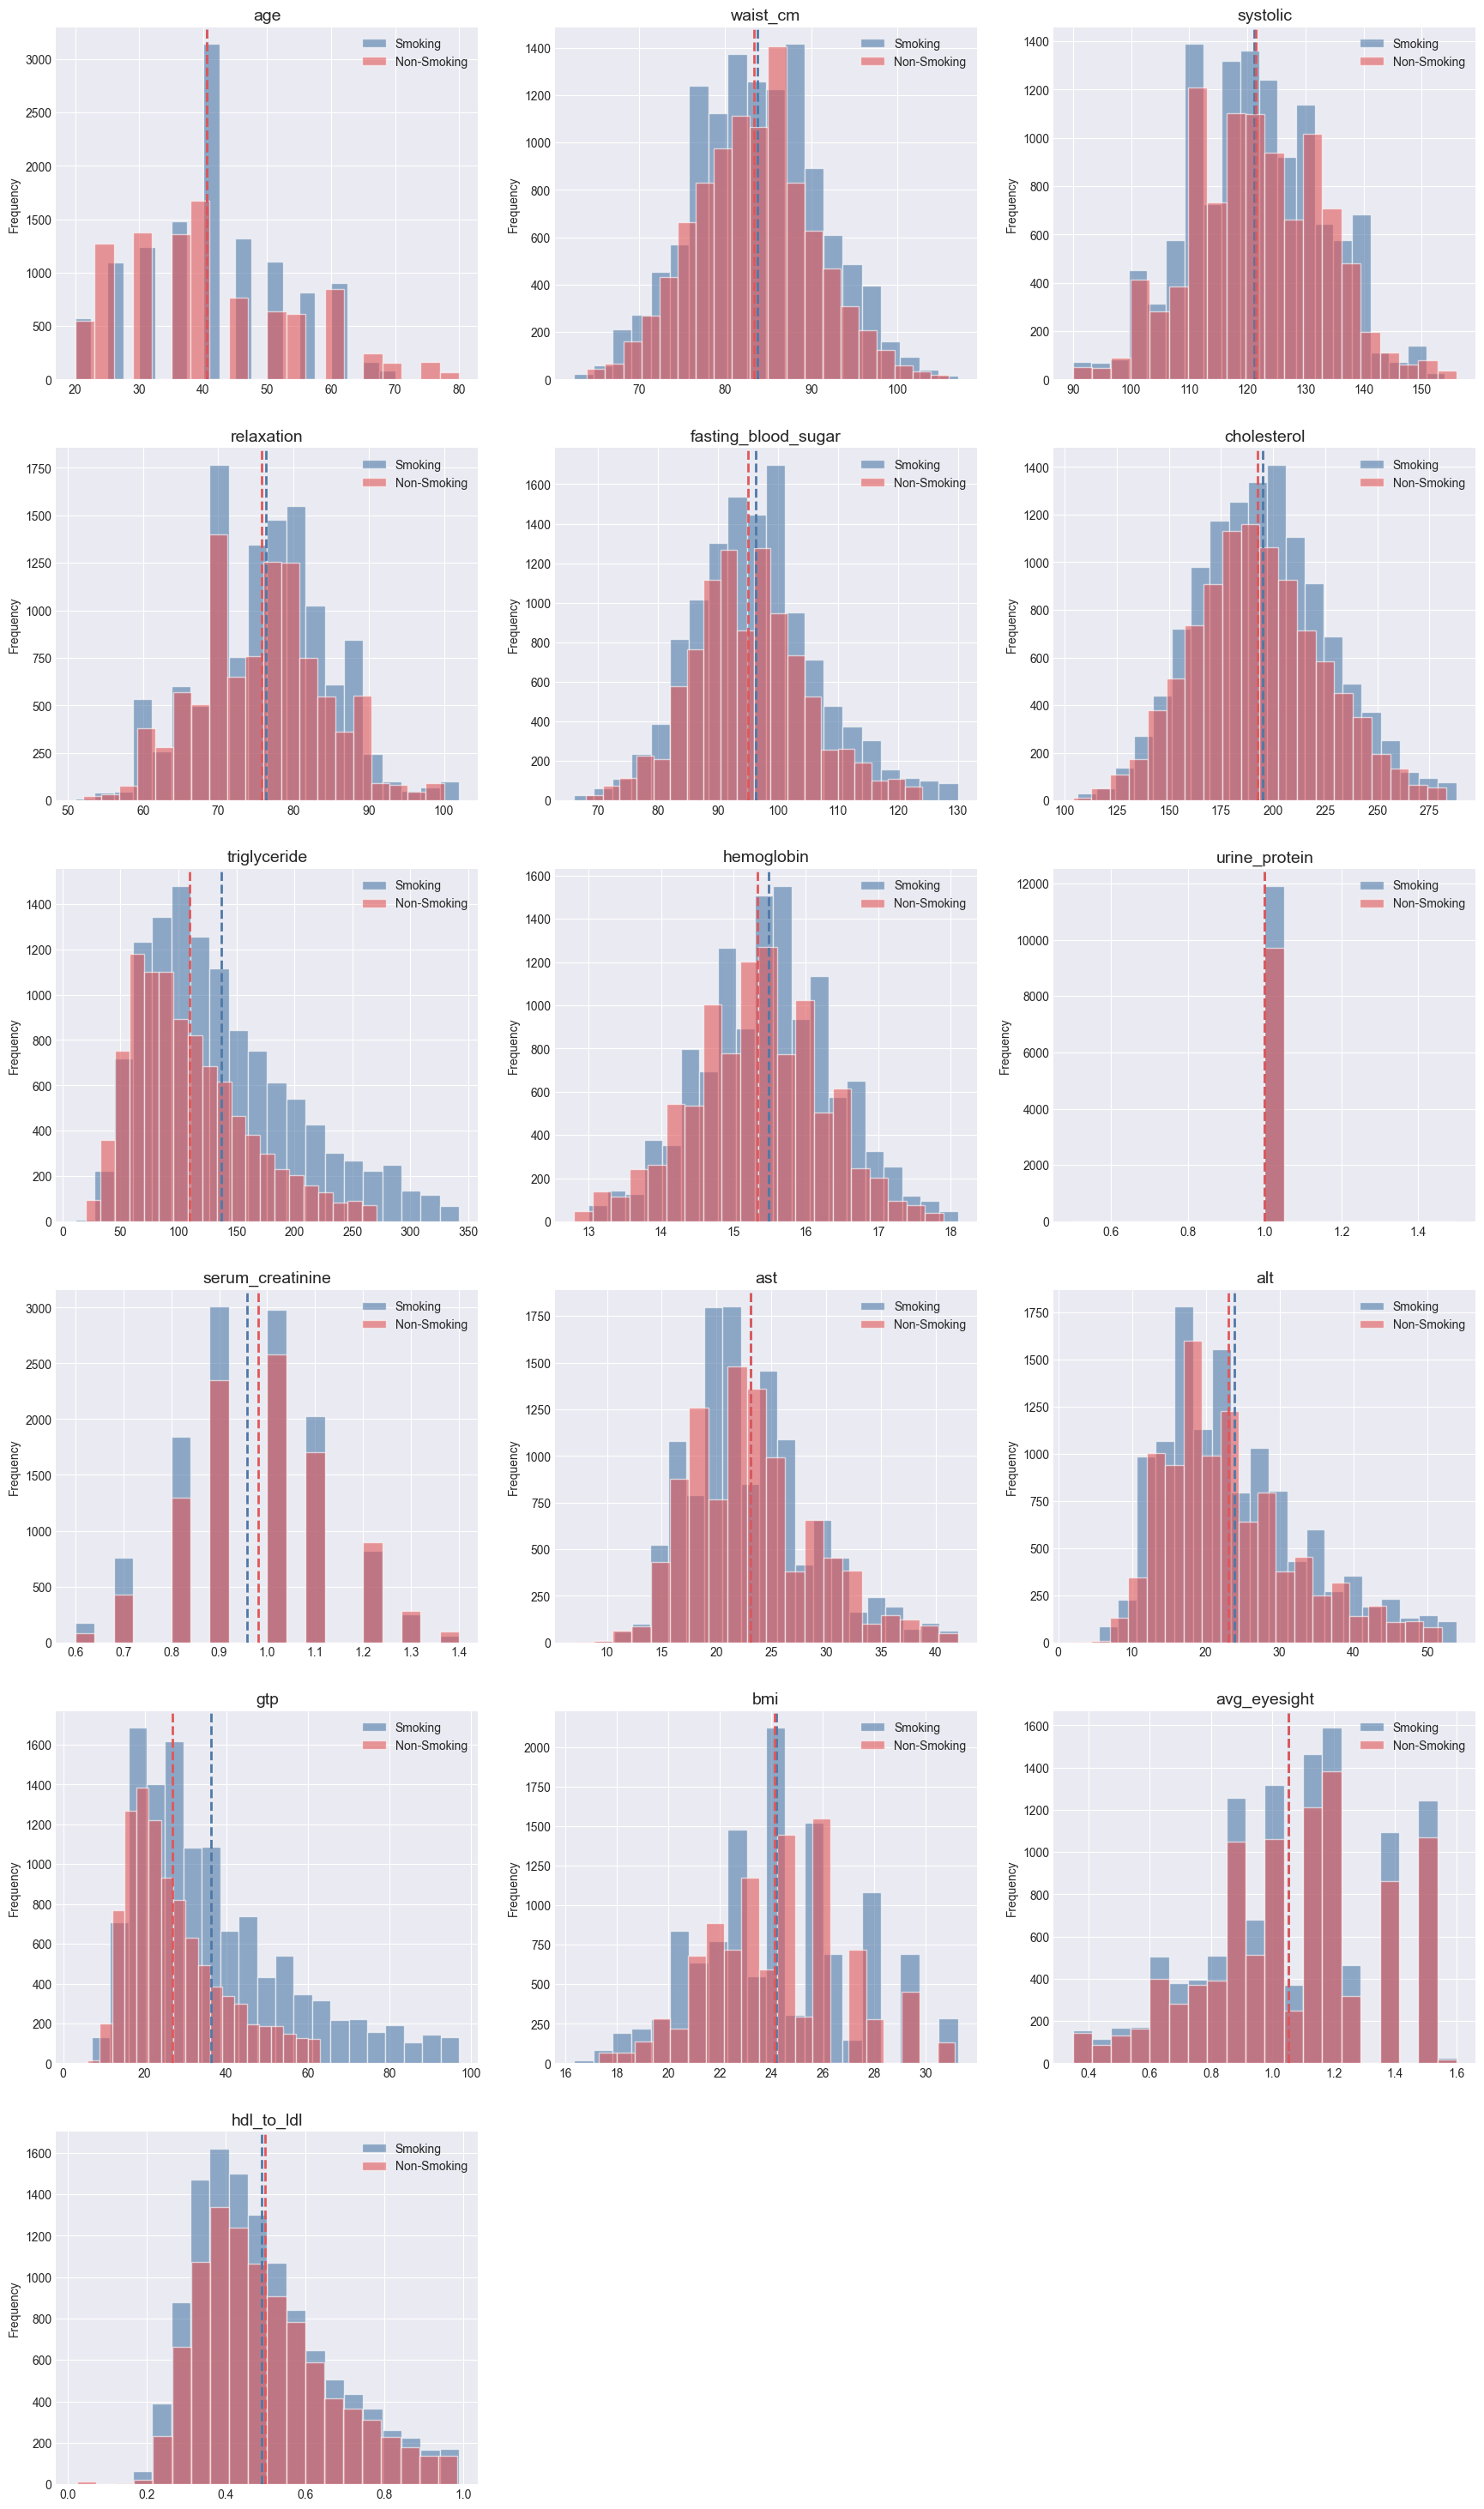

In [96]:
plot_comparison_histogram_style(numeric_cols,smoking_male_ou,"Smoking",no_smoking_male_ou,"Non-Smoking")

**Gender-Based Analysis (Male vs Female)**

In [97]:
male = df[df["gender"] == "Male"]
female = df[df["gender"] == "Female"]

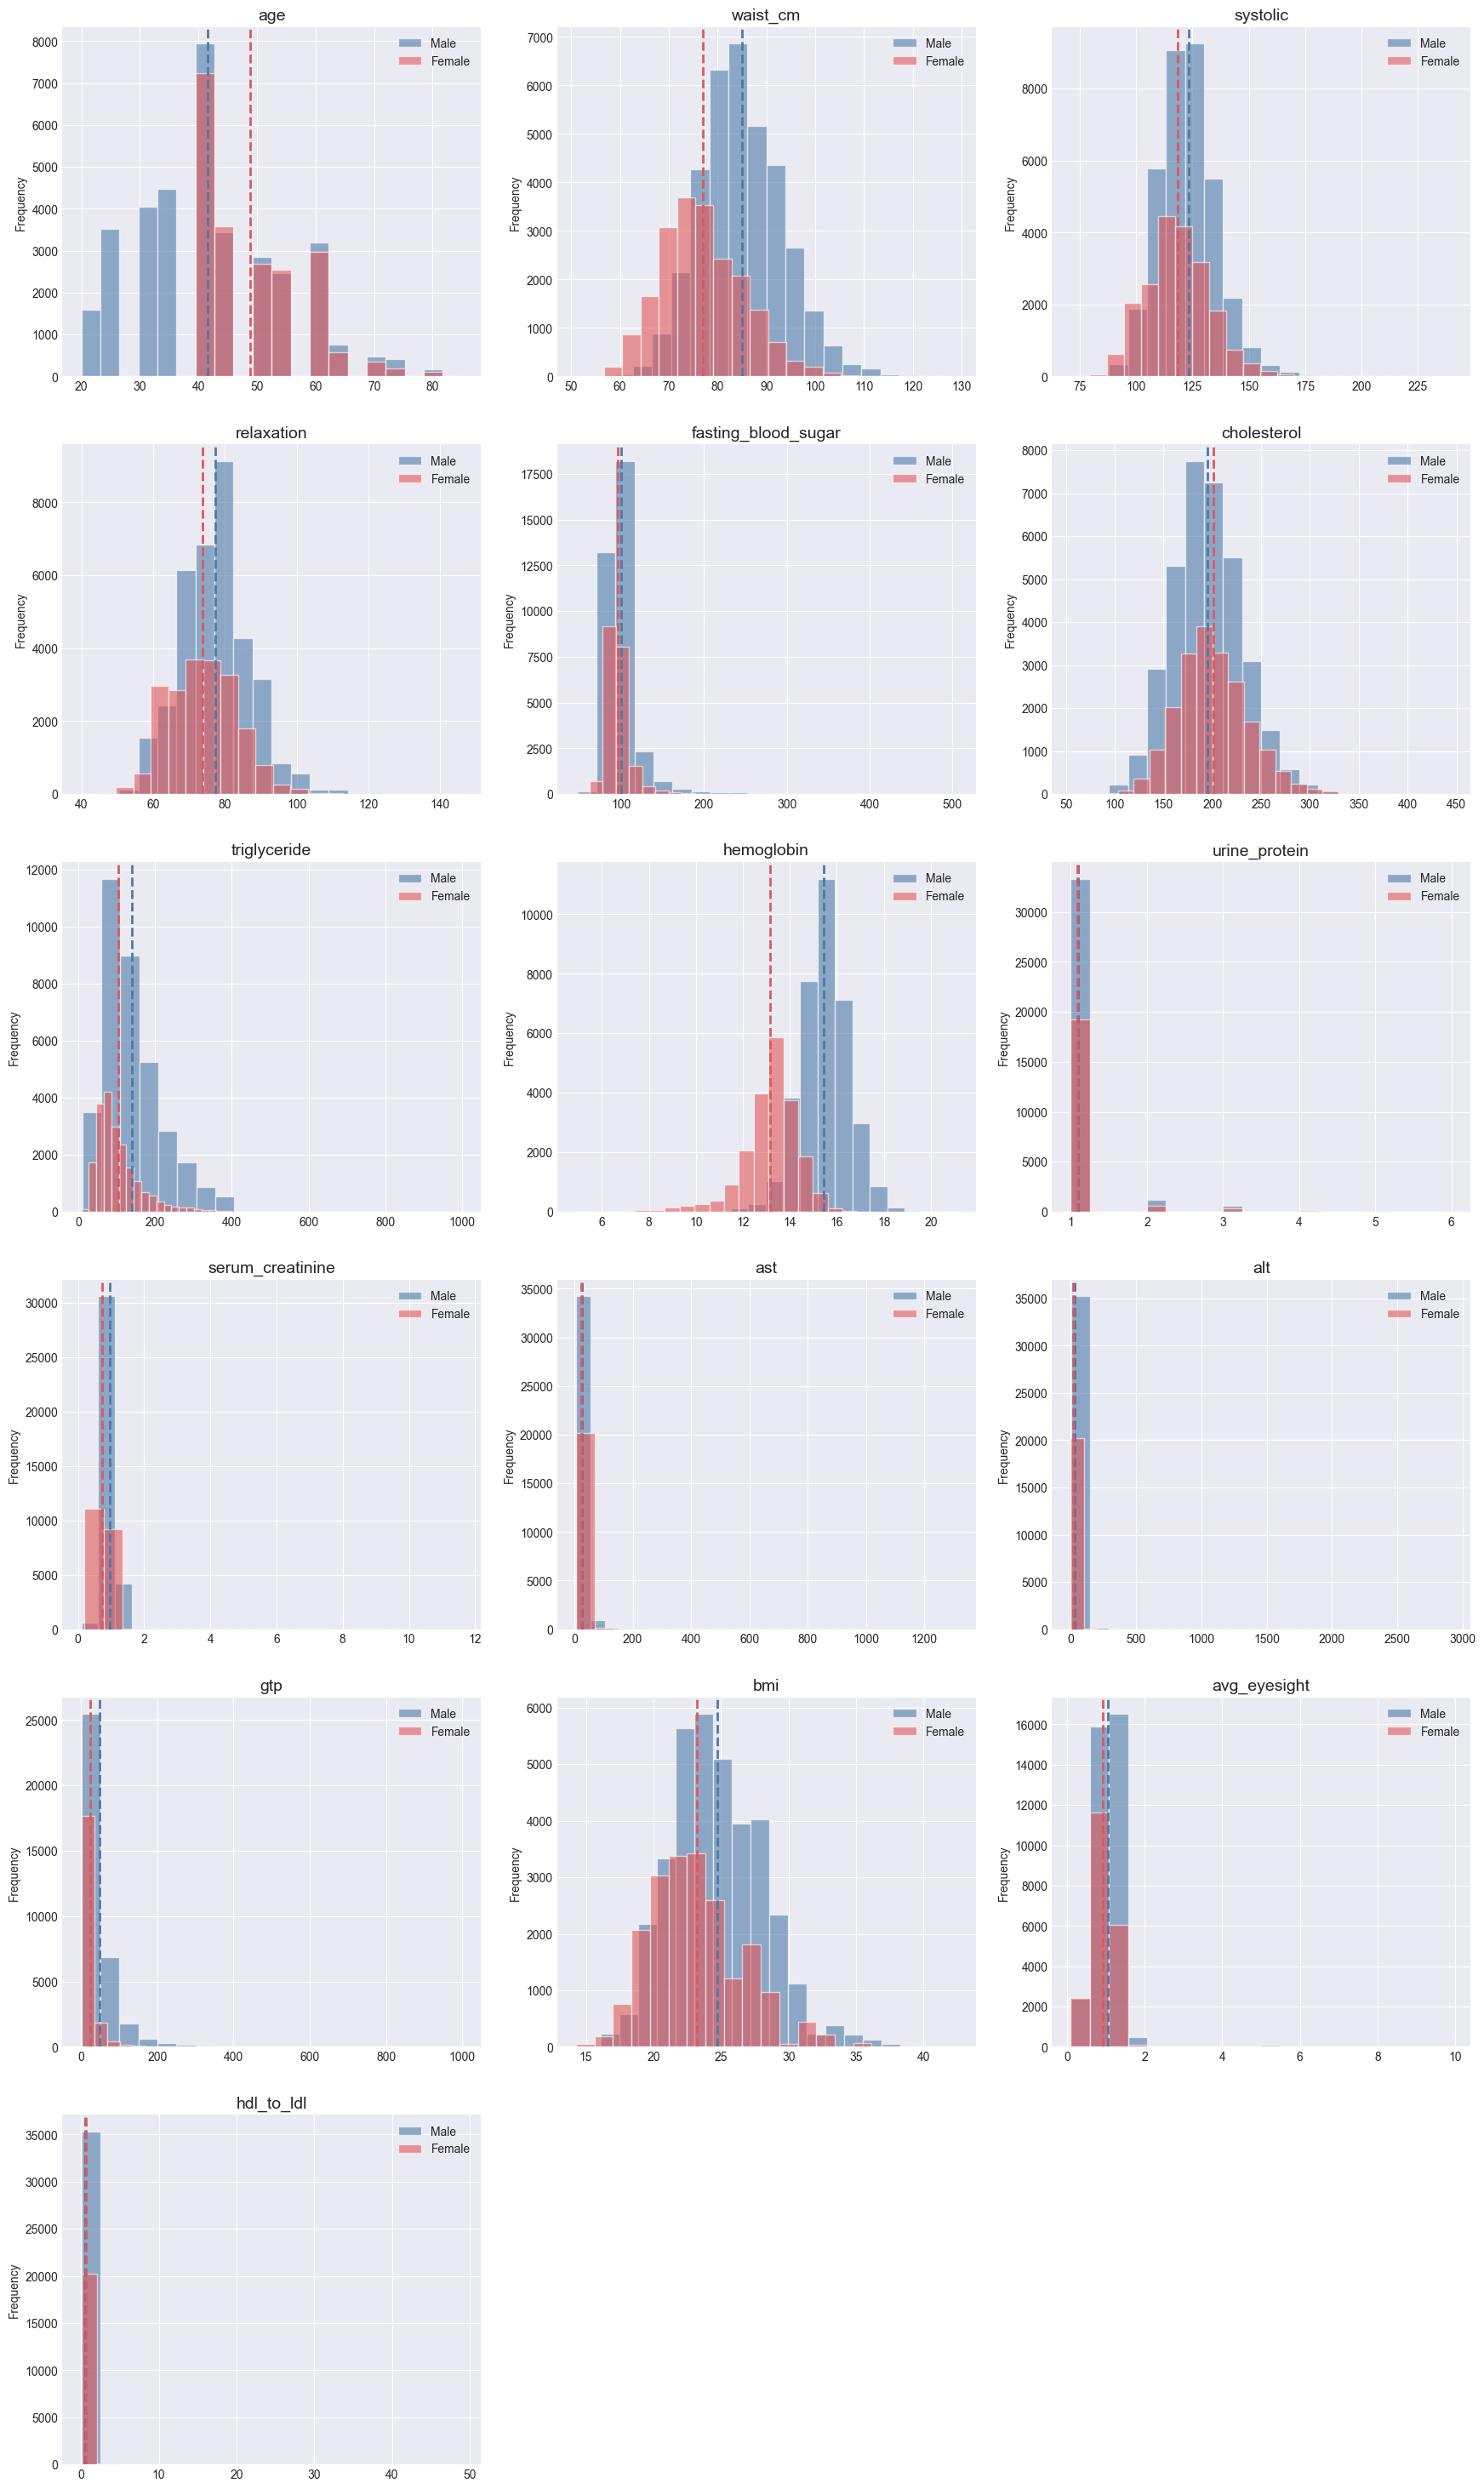

In [98]:
plot_comparison_histogram_style(numeric_cols,male,"Male",female,"Female")

In [99]:
male_ou = remove_outliers_iqr(male,numeric_cols) 
female_ou = remove_outliers_iqr(female,numeric_cols)

Original shapes:

(35401, 20)
Without outliers:

(21510, 20)
Original shapes:

(20291, 20)
Without outliers:

(12515, 20)


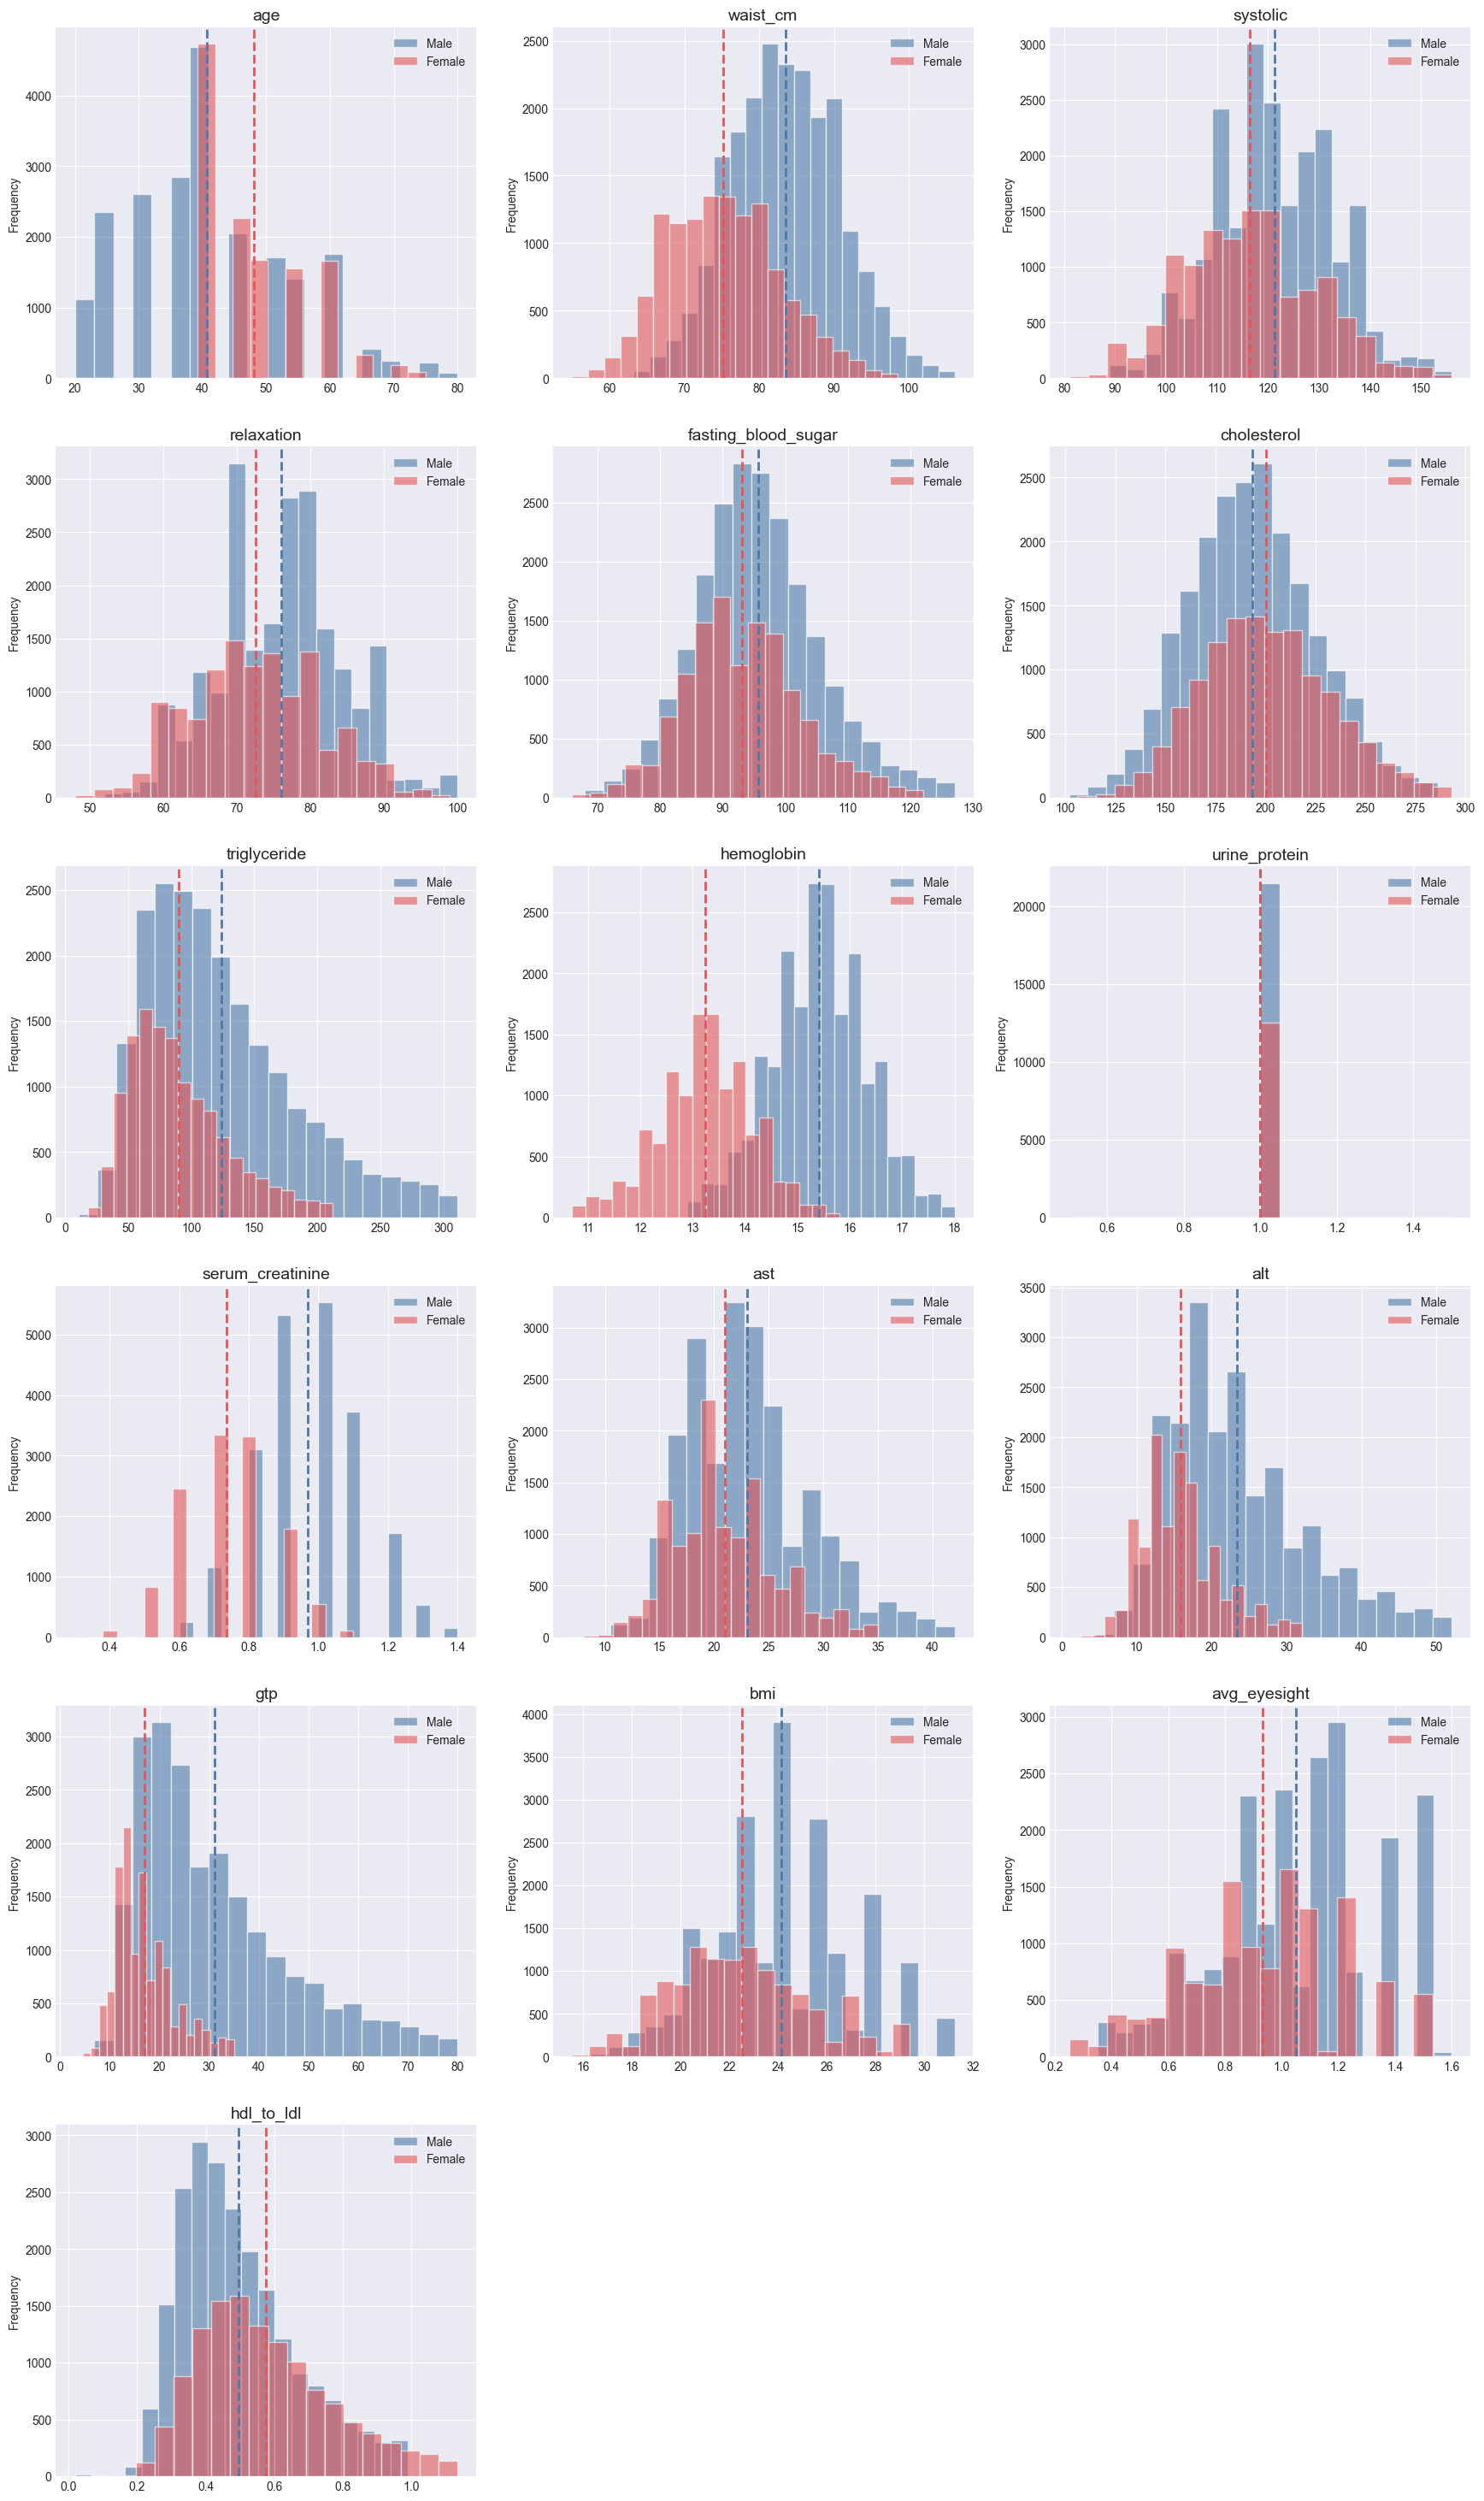

In [100]:
plot_comparison_histogram_style(numeric_cols,male_ou,"Male",female_ou,"Female")

**Non-Smoker-Gender-Based Analysis (Male Non-Smoker vs Female Non-Smoker)**

In [101]:
no_smoking_male = male_ou[male_ou["smoking"] == "No"]
no_smoking_female = female_ou[female_ou["smoking"] == "No"]

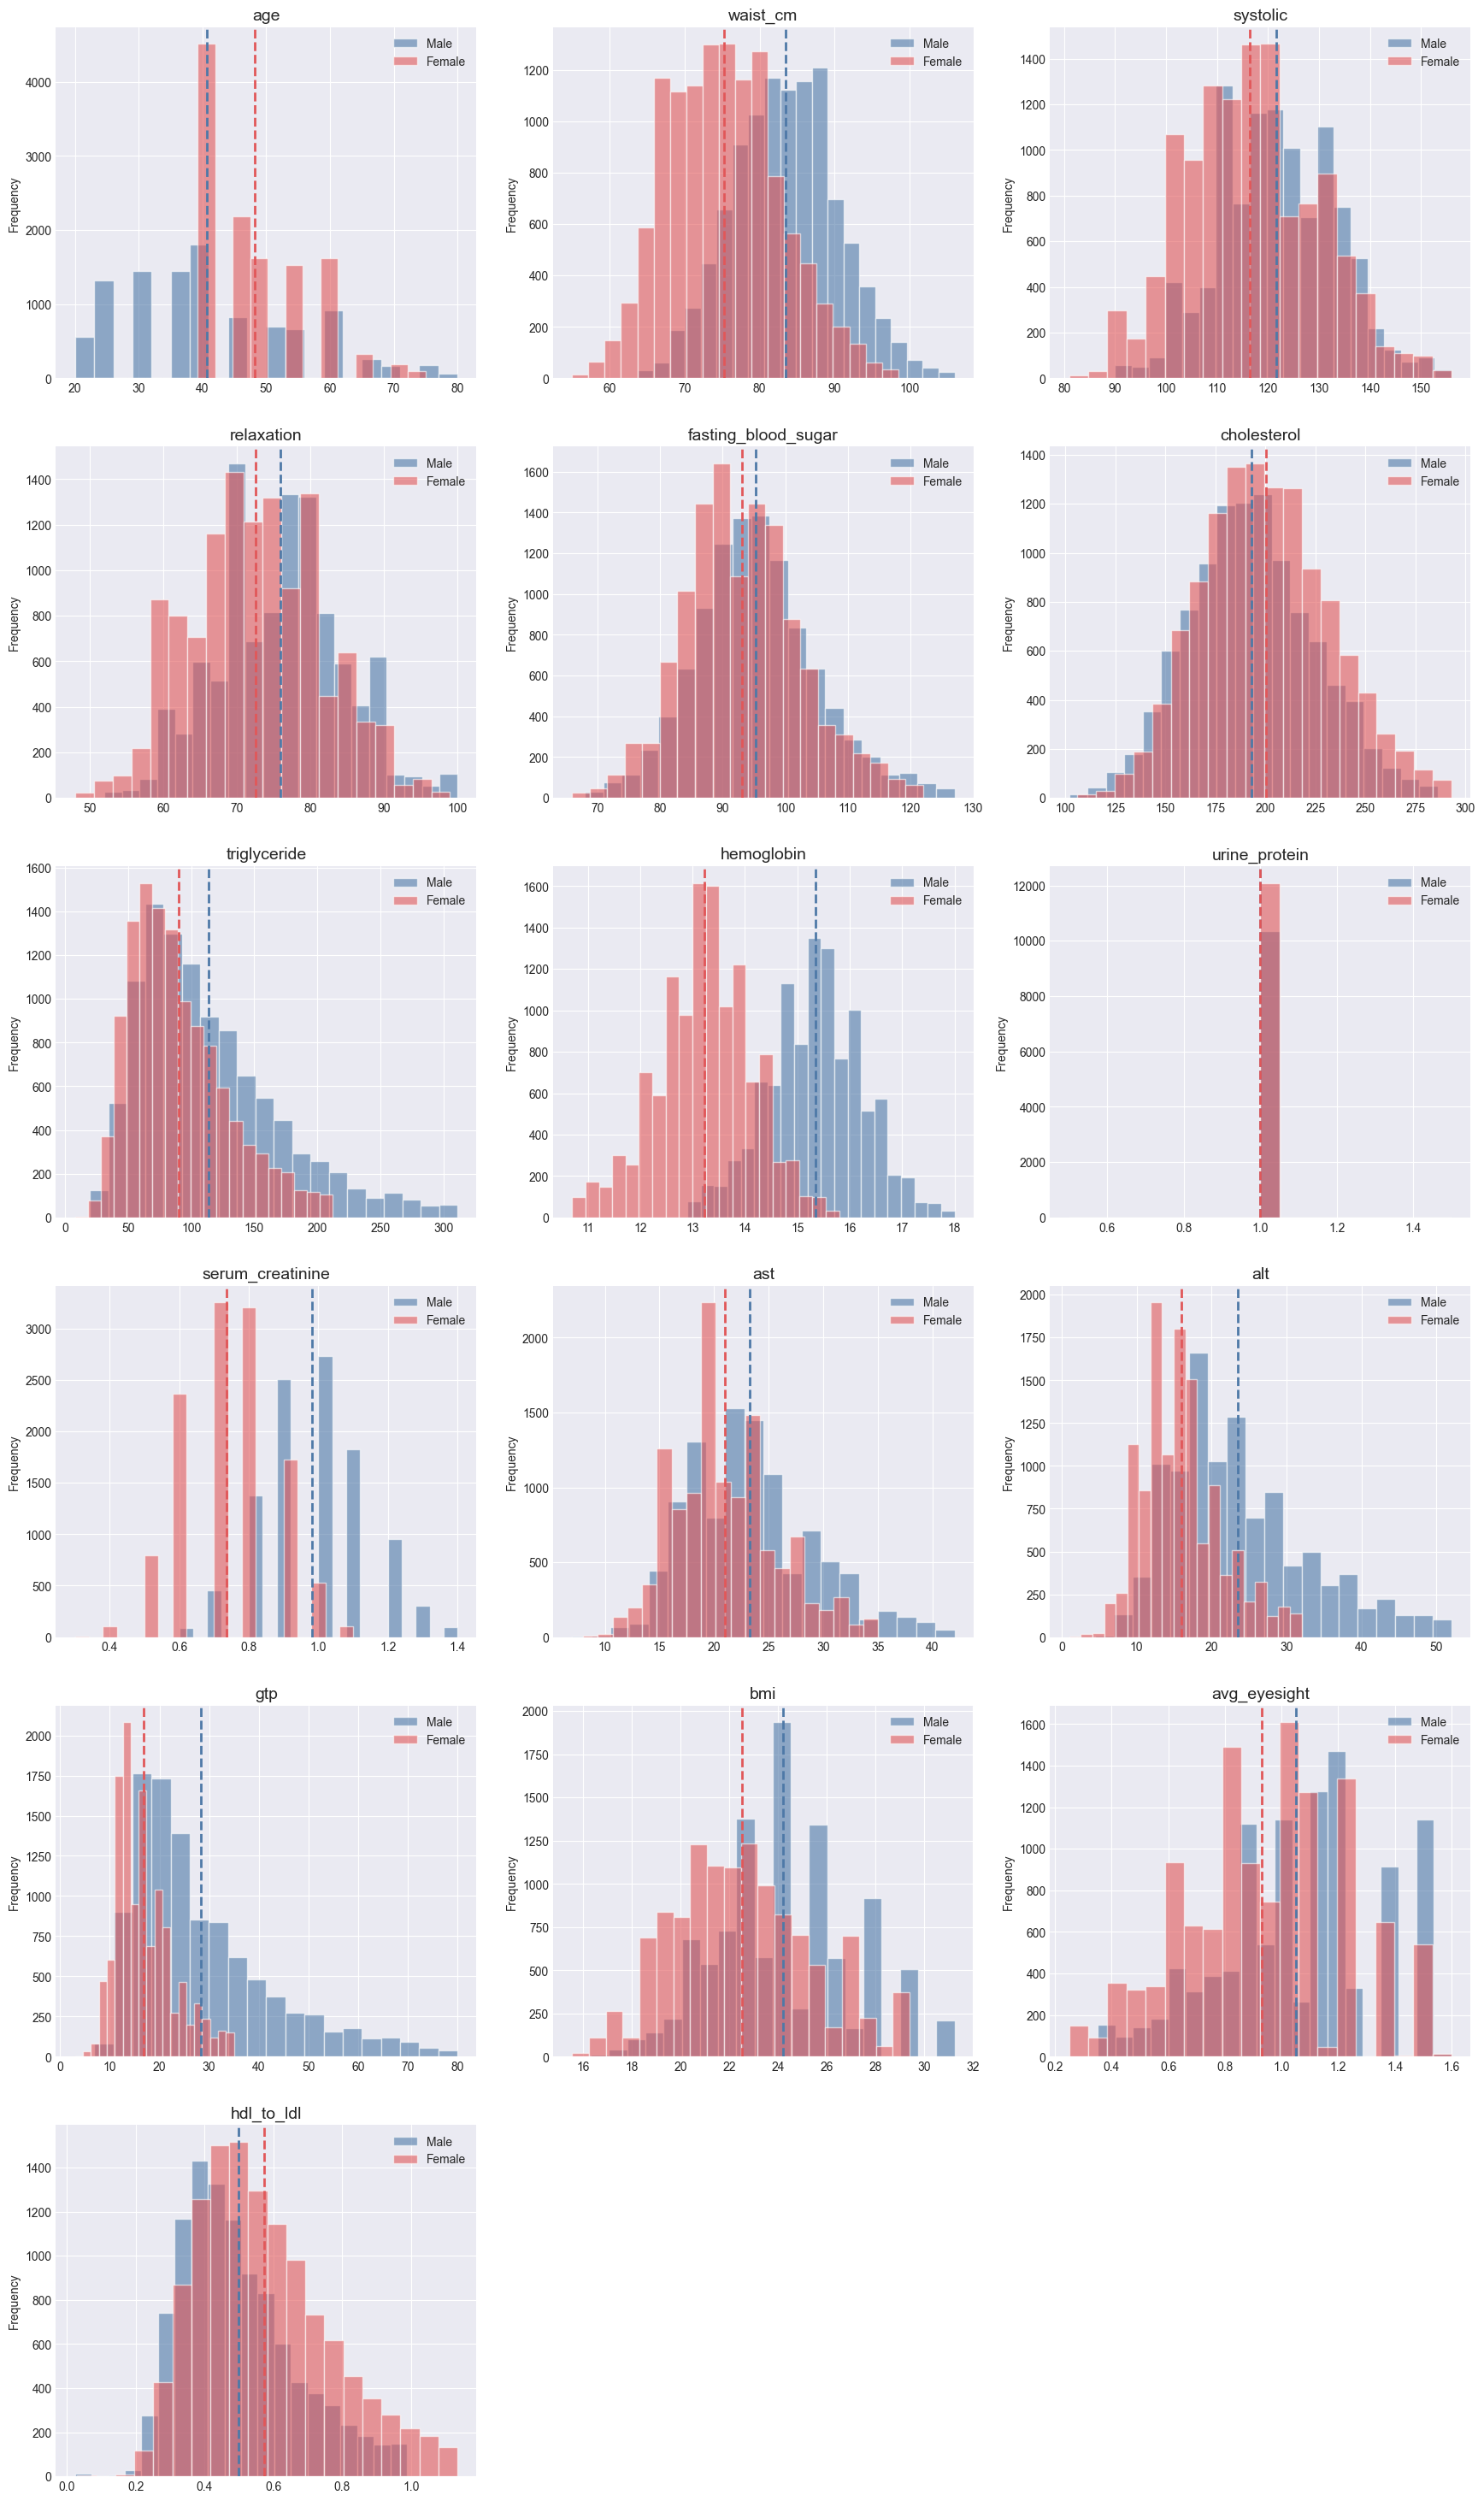

In [102]:
plot_comparison_histogram_style(numeric_cols,no_smoking_male,"Male",no_smoking_female,"Female")

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Dimensionality Reduction
</p>

 **PCA**

In [103]:
df_dim_reduction = df.copy(deep=True)
df_dim_reduction = df_dim_reduction.drop(columns="urine_protein",axis=1)

cols_dim_reduction = df_dim_reduction.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dim_reduction[cols_dim_reduction])

standardized_df = pd.DataFrame(X_scaled, columns = cols_dim_reduction)
standardized_df.head()

age  waist_cm  systolic  relaxation  fasting_blood_sugar  cholesterol  \
0 -0.346517 -0.080484 -0.547989   -0.310442            -0.255457     0.498616   
1 -0.346517 -0.112832 -0.182381   -0.620386             1.475695    -0.135034   
2  0.896099 -0.220659  1.206928    1.032645            -0.495894     1.242467   
3 -0.346517  0.641955 -1.571690   -1.653530            -0.159282     3.446468   
4 -0.346517  0.426302 -0.109259   -0.207128            -0.928682    -0.355434   

   triglyceride  hemoglobin  serum_creatinine       ast       alt       gtp  \
0     -0.623481   -1.101061         -0.838461 -0.422775 -0.259666 -0.257550   
1     -0.162840   -1.228898         -1.289883 -0.216113 -0.259666 -0.436511   
2      0.772403    0.752585          0.515806 -0.267779 -0.356604 -0.356973   
3      1.777440    0.049478          0.515806 -0.371110 -0.033477 -0.436511   
4     -0.735152   -1.356736         -1.289883 -0.526106 -0.421230 -0.356973   

        bmi  avg_eyesight  hdl_to_ldl  
0  0.232458      0.224745    0.038682  
1 -0.209413     -0.774488   -0.477153  
2 -0.979067     -0.524680   -0.407596  
3  0.444604      1.223979   -0.750143  
4  0.232458     -0.025063    0.038836

In [105]:
corr_matrix = standardized_df.corr()
corr_matrix

age  waist_cm  systolic  relaxation  \
age                  1.000000 -0.026297  0.134023    0.050745   
waist_cm            -0.026297  1.000000  0.316922    0.292627   
systolic             0.134023  0.316922  1.000000    0.761051   
relaxation           0.050745  0.292627  0.761051    1.000000   
fasting_blood_sugar  0.182351  0.211132  0.172700    0.147879   
cholesterol          0.055557  0.065467  0.059572    0.095357   
triglyceride         0.015102  0.361922  0.198826    0.215541   
hemoglobin          -0.263078  0.387066  0.186514    0.232899   
serum_creatinine    -0.106118  0.235024  0.072288    0.085033   
ast                  0.032576  0.142690  0.083204    0.085151   
alt                 -0.063937  0.252478  0.094893    0.106648   
gtp                  0.013031  0.243141  0.165724    0.177648   
bmi                 -0.063384  0.819226  0.299640    0.280662   
avg_eyesight        -0.235850  0.039761 -0.020083    0.010055   
hdl_to_ldl          -0.003352 -0.134502 -0.014021   -0.030611   

                     fasting_blood_sugar  cholesterol  triglyceride  \
age                             0.182351     0.055557      0.015102   
waist_cm                        0.211132     0.065467      0.361922   
systolic                        0.172700     0.059572      0.198826   
relaxation                      0.147879     0.095357      0.215541   
fasting_blood_sugar             1.000000     0.009903      0.227746   
cholesterol                     0.009903     1.000000      0.247581   
triglyceride                    0.227746     0.247581      1.000000   
hemoglobin                      0.099921     0.061503      0.273353   
serum_creatinine                0.041341    -0.000129      0.124986   
ast                             0.068772     0.026594      0.101696   
alt                             0.087616     0.050676      0.175164   
gtp                             0.182414     0.083531      0.301876   
bmi                             0.171535     0.094269      0.316197   
avg_eyesight                   -0.052161    -0.007797      0.024057   
hdl_to_ldl                     -0.007076    -0.293643     -0.102021   

                     hemoglobin  serum_creatinine       ast       alt  \
age                   -0.263078         -0.106118  0.032576 -0.063937   
waist_cm               0.387066          0.235024  0.142690  0.252478   
systolic               0.186514          0.072288  0.083204  0.094893   
relaxation             0.232899          0.085033  0.085151  0.106648   
fasting_blood_sugar    0.099921          0.041341  0.068772  0.087616   
cholesterol            0.061503         -0.000129  0.026594  0.050676   
triglyceride           0.273353          0.124986  0.101696  0.175164   
hemoglobin             1.000000          0.371382  0.120575  0.202025   
serum_creatinine       0.371382          1.000000  0.048548  0.083602   
ast                    0.120575          0.048548  1.000000  0.740726   
alt                    0.202025          0.083602  0.740726  1.000000   
gtp                    0.223844          0.102411  0.379959  0.343934   
bmi                    0.254233          0.146603  0.126383  0.233755   
avg_eyesight           0.116256          0.072323 -0.009045  0.026431   
hdl_to_ldl            -0.087317         -0.048731  0.009621 -0.036336   

                          gtp       bmi  avg_eyesight  hdl_to_ldl  
age                  0.013031 -0.063384     -0.235850   -0.003352  
waist_cm             0.243141  0.819226      0.039761   -0.134502  
systolic             0.165724  0.299640     -0.020083   -0.014021  
relaxation           0.177648  0.280662      0.010055   -0.030611  
fasting_blood_sugar  0.182414  0.171535     -0.052161   -0.007076  
cholesterol          0.083531  0.094269     -0.007797   -0.293643  
triglyceride         0.301876  0.316197      0.024057   -0.102021  
hemoglobin           0.223844  0.254233      0.116256   -0.087317  
serum_creatinine     0.102411  0.146603      0.072323   -0.048731  

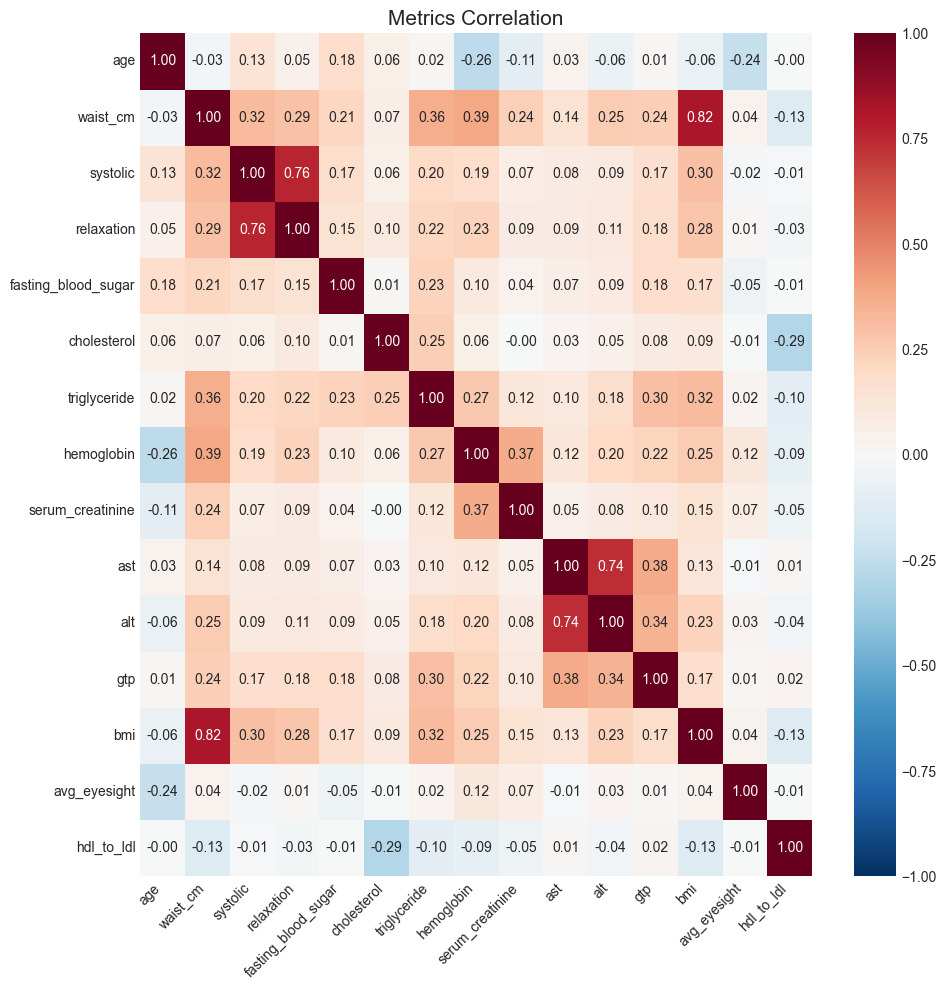

In [106]:
plt.figure(figsize=(10, 10))

sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r", vmin=-1, vmax=1,fmt=".2f")

plt.title("Metrics Correlation", fontsize=15)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [107]:
pca = PCA()
pca.fit(corr_matrix)

summary = pd.DataFrame({
    "Componente": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "Varianza explicada": np.round(pca.explained_variance_ratio_, 4),
    "Varianza acumulada": np.round(np.cumsum(pca.explained_variance_ratio_),4)
})

print(summary)

   Componente  Varianza explicada  Varianza acumulada
0         PC1              0.2651              0.2651
1         PC2              0.1783              0.4434
2         PC3              0.1451              0.5886
3         PC4              0.1067              0.6953
4         PC5              0.0788              0.7741
5         PC6              0.0598              0.8339
6         PC7              0.0504              0.8843
7         PC8              0.0407              0.9251
8         PC9              0.0272              0.9523
9        PC10              0.0213              0.9736
10       PC11              0.0176              0.9912
11       PC12              0.0036              0.9948
12       PC13              0.0034              0.9982
13       PC14              0.0018              1.0000
14       PC15              0.0000              1.0000


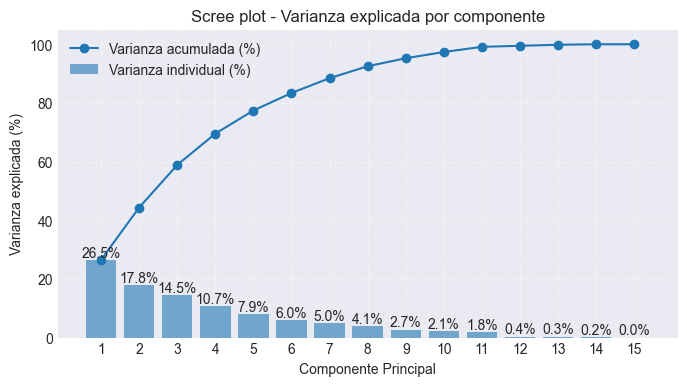

In [108]:
explained_var = pca.explained_variance_ratio_ * 100
plt.figure(figsize=(8,4))
n_comp = len(pca.explained_variance_ratio_)

plt.plot(range(1, n_comp+1), np.cumsum(pca.explained_variance_ratio_)*100, marker='o', label='Varianza acumulada (%)')

plt.bar(range(1, n_comp+1), pca.explained_variance_ratio_*100, alpha=0.6, label='Varianza individual (%)')

plt.xlabel('Componente Principal')
plt.ylabel('Varianza explicada (%)')

plt.title('Scree plot - Varianza explicada por componente')
plt.xticks(range(1, n_comp+1))
plt.legend()

plt.grid(True, linestyle='--', alpha=0.4)
for i, v in enumerate(explained_var):
    plt.text(i + 1, v + 1, f"{v:.1f}%", ha='center')

plt.show()

 **UMAP**

In [109]:
import umap

reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

X_umap = reducer.fit_transform(X_scaled)


c:\Users\jeroh\OneDrive\Documentos\PredictiveAnalytics-Projects\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


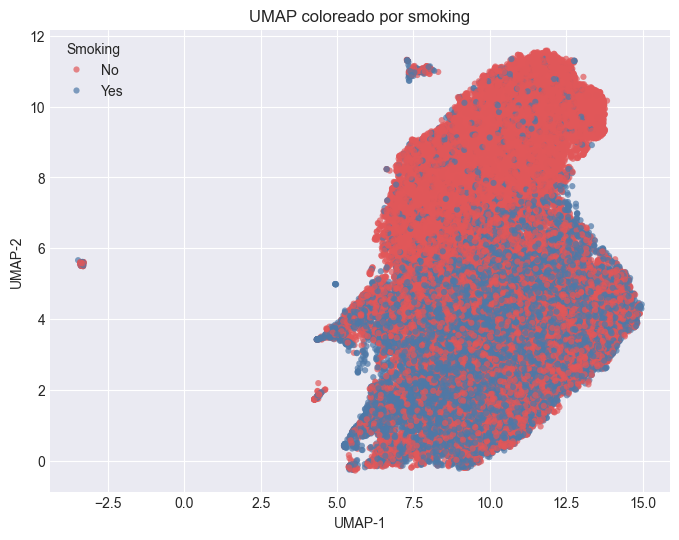

In [110]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x = X_umap[:, 0], 
    y = X_umap[:, 1], 
    hue = df_dim_reduction["smoking"],  
    palette = [colors_palette["coral"],colors_palette["steel_blue"]],
    s=20,
    alpha=0.7,
    edgecolor='none'
)

plt.title("UMAP coloreado por smoking")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Smoking") 
plt.show()

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Preprocessing For Classification
</p>

In [111]:
df_train = df.copy(deep=True)
df_train = df_train.drop(columns="urine_protein",axis=1)

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
onehot_cols = ["gender"]
label_cols = ["dental_caries", "tartar"]

y = df_train["smoking"]
X = df_train.drop(columns=["smoking"])

le = LabelEncoder()
y = le.fit_transform(y)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("gender_ohe", OneHotEncoder(handle_unknown="ignore"), onehot_cols),
        ("label_enc", OrdinalEncoder(), label_cols)
    ],
    remainder="drop"
)

X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gender_test = X_test_df["gender"].values

X_train = preprocessor.fit_transform(X_train_df)
X_test = preprocessor.transform(X_test_df)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test:  {X_test.shape}, {y_test.shape}")

feature_names = preprocessor.get_feature_names_out()
print(feature_names)


Train: (44553, 19), (44553,)
Test:  (11139, 19), (11139,)
['num__age' 'num__waist_cm' 'num__systolic' 'num__relaxation'
 'num__fasting_blood_sugar' 'num__cholesterol' 'num__triglyceride'
 'num__hemoglobin' 'num__serum_creatinine' 'num__ast' 'num__alt'
 'num__gtp' 'num__bmi' 'num__avg_eyesight' 'num__hdl_to_ldl'
 'gender_ohe__gender_Female' 'gender_ohe__gender_Male'
 'label_enc__dental_caries' 'label_enc__tartar']


<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Classification Models
</p>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),
    "SVM": SVC(C=100, gamma=0.002),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        random_state=42
    )
}

results = {}

best_accuracy = 0
best_model = None
best_model_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds) 
    results[name] = {
        "Accuracy": round(acc * 100, 2),
        "Confusion Matrix": confusion_matrix(y_test, preds),
        "Report": classification_report(y_test, preds)
    }


    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

    print(f"Modelo: {name} - Accuracy: {results[name]['Accuracy']}%")

print(f"\nEl mejor modelo es: {best_model_name} con {round(best_accuracy*100, 2)}%")

Modelo: Logistic Regression - Accuracy: 74.16%
Modelo: Gaussian NB - Accuracy: 70.33%
Modelo: Bernoulli NB - Accuracy: 70.99%
Modelo: SVM - Accuracy: 75.55%
Modelo: Random Forest - Accuracy: 83.36%
Modelo: KNN - Accuracy: 73.5%
Modelo: XGBoost - Accuracy: 77.95%

🏆 El mejor modelo es: Random Forest con 83.36%


In [ ]:

reducer_test = umap.UMAP(
    n_neighbors=15, 
    min_dist=0.1, 
    n_components=2, 
    random_state=42
)

X_umap_test = reducer_test.fit_transform(X_test)

y_pred_test = best_model.predict(X_test)



c:\Users\jeroh\OneDrive\Documentos\PredictiveAnalytics-Projects\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


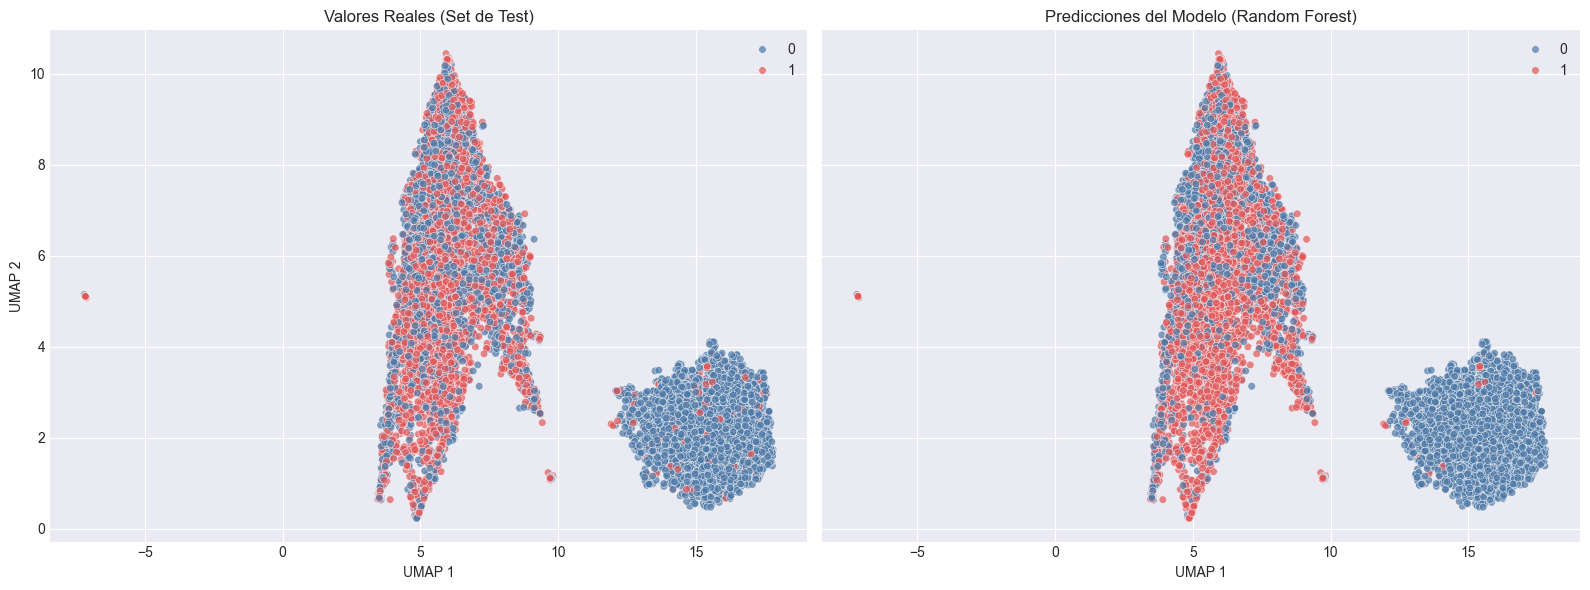

In [ ]:
colors = [colors_palette["steel_blue"], colors_palette["coral"]]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)


sns.scatterplot(
    x=X_umap_test[:, 0], 
    y=X_umap_test[:, 1],
    hue=y_test, 
    palette=colors, 
    s=30, alpha=0.7, ax=axes[0]
)
axes[0].set_title("Valores Reales (Set de Test)")
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")


sns.scatterplot(
    x=X_umap_test[:, 0], 
    y=X_umap_test[:, 1],
    hue=y_pred_test, 
    palette=colors, 
    s=30, alpha=0.7, ax=axes[1]
)
axes[1].set_title(f"Predicciones del Modelo ({best_model_name})")
axes[1].set_xlabel("UMAP 1")

plt.tight_layout()
plt.show()

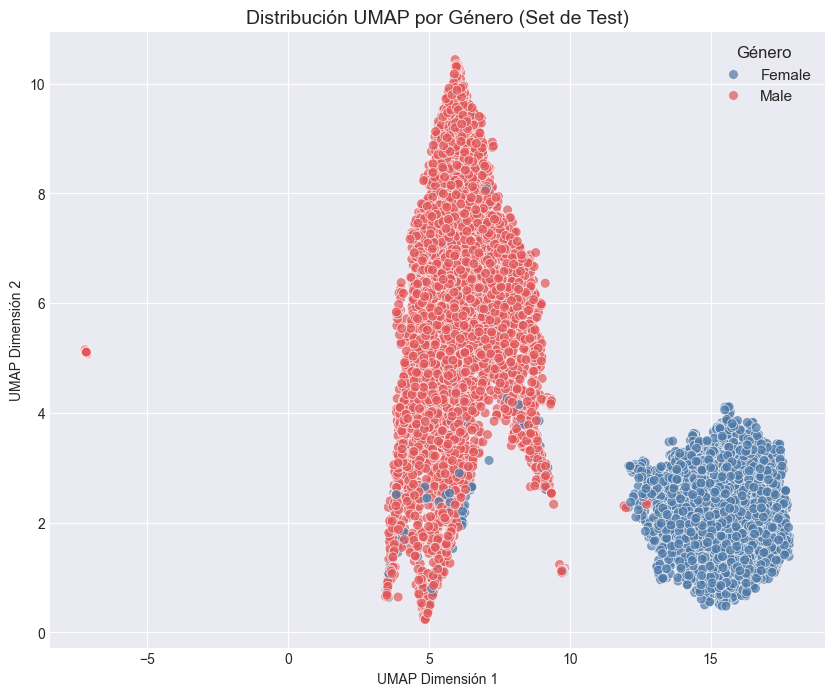

In [ ]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    x=X_umap_test[:, 0],
    y=X_umap_test[:, 1],
    hue=gender_test, 
    palette=colors,   
    s=50,            
    alpha=0.7        
)


plt.title("Distribución UMAP por Género (Set de Test)", fontsize=14)
plt.xlabel("UMAP Dimensión 1")
plt.ylabel("UMAP Dimensión 2")

plt.legend(title="Género", title_fontsize='12', fontsize='11')

plt.show()

In [131]:

mask_train_male = X_train_df['gender'] == 'Male'
mask_test_male = X_test_df['gender'] == 'Male'


X_train_male_df = X_train_df[mask_train_male]
X_test_male_df = X_test_df[mask_test_male]


y_train_male = y_train[mask_train_male]
y_test_male = y_test[mask_test_male]

In [132]:

num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
label_cols = ["dental_caries", "tartar"]


preprocessor_male = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("label_enc", OrdinalEncoder(), label_cols)
    ],
    remainder="drop"
)

X_train_male = preprocessor_male.fit_transform(X_train_male_df)
X_test_male = preprocessor_male.transform(X_test_male_df)

print(f"Nuevo set Hombres - Train: {X_train_male.shape}, Test: {X_test_male.shape}")

Nuevo set Hombres - Train: (28326, 17), Test: (7075, 17)


In [133]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),
    "SVM": SVC(C=100, gamma=0.002),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        random_state=42
    )
}

results = {}

best_accuracy = 0
best_model = None
best_model_name = ""

for name, model in models.items():
    model.fit(X_train_male, y_train_male)
    preds = model.predict(X_test_male)
    
    acc = accuracy_score(y_test_male, preds) 
    results[name] = {
        "Accuracy": round(acc * 100, 2),
        "Confusion Matrix": confusion_matrix(y_test_male, preds),
        "Report": classification_report(y_test_male, preds)
    }


    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

    print(f"Modelo: {name} - Accuracy: {results[name]['Accuracy']}%")

print(f"\nEl mejor modelo es: {best_model_name} con {round(best_accuracy*100, 2)}%")

Modelo: Logistic Regression - Accuracy: 62.05%
Modelo: Gaussian NB - Accuracy: 54.61%
Modelo: Bernoulli NB - Accuracy: 59.48%
Modelo: SVM - Accuracy: 63.84%
Modelo: Random Forest - Accuracy: 75.65%
Modelo: KNN - Accuracy: 61.23%
Modelo: XGBoost - Accuracy: 68.59%

El mejor modelo es: Random Forest con 75.65%


In [134]:

reducer_test = umap.UMAP(
    n_neighbors=15, 
    min_dist=0.1, 
    n_components=2, 
    random_state=42
)

X_umap_test = reducer_test.fit_transform(X_test_male)

y_pred_test = best_model.predict(X_test_male)

c:\Users\jeroh\OneDrive\Documentos\PredictiveAnalytics-Projects\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


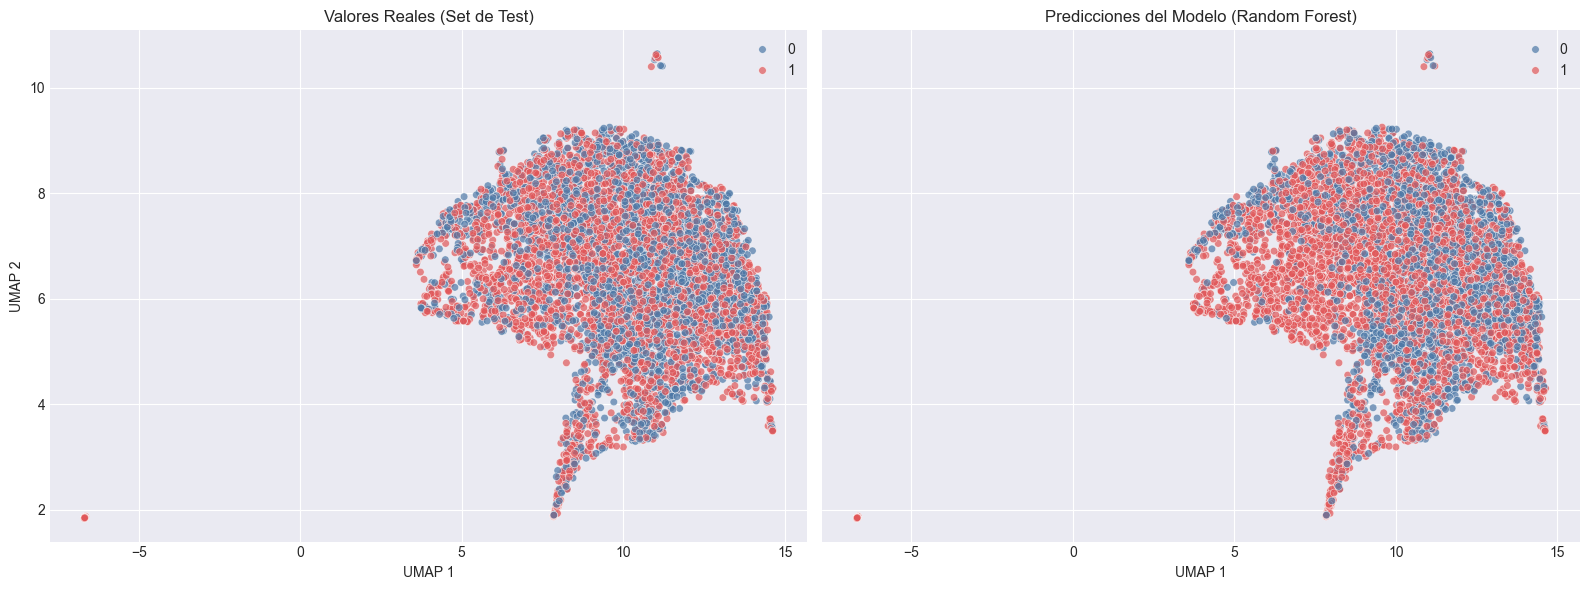

In [136]:
colors = [colors_palette["steel_blue"], colors_palette["coral"]]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)


sns.scatterplot(
    x=X_umap_test[:, 0], 
    y=X_umap_test[:, 1],
    hue=y_test_male, 
    palette=colors, 
    s=30, alpha=0.7, ax=axes[0]
)
axes[0].set_title("Valores Reales (Set de Test)")
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")


sns.scatterplot(
    x=X_umap_test[:, 0], 
    y=X_umap_test[:, 1],
    hue=y_pred_test, 
    palette=colors, 
    s=30, alpha=0.7, ax=axes[1]
)
axes[1].set_title(f"Predicciones del Modelo ({best_model_name})")
axes[1].set_xlabel("UMAP 1")

plt.tight_layout()
plt.show()

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Final Evaluation and Insights
</p>

<a id="1"></a>

<p style="
    padding:12px;
    background-color:#ffffff;
    margin:0;
    color:#000000;
    font-family:serif;
    font-size:200%;
    text-align:center;
    border-radius: 15px 50px;
    overflow:hidden;
    font-weight:600;
    border: 2px solid #000000;
">
    Thank You
</p>

<br>

### Contact Information

**Name:** Jerónimo Hoyos Botero

**Connect on LinkedIn:** https://www.linkedin.com/in/yourprofile 
 
**Explore Github:** https://github.com/yourusername  

---

### References

- https://www.kaggle.com/code/eisgandar/oversampling-methods-on-unbalanced-datasets
- https://www.kaggle.com/code/eisgandar/smoking-signal-of-body-classification#6-%7C-DATASET-PREPROCESSING
- https://www.kaggle.com/code/bugraorhan/how-your-body-reacts-to-smoking#📊-Step-3:-Exploratory-Data-Analysis-(EDA)
- https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4